<a href="https://colab.research.google.com/github/sk-aili/market-basket-analysis/blob/main/Market_Basket.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Market Basket Analysis


**What is Market Basket Analysis ?**

Market Basket Analysis is one of the key techniques used by large retailers to uncover associations between items.
It works by looking for combinations of items that occur together frequently in transactions. To put it another way, it allows retailers to identify relationships between the items that people buy.

# Market Basket Analysis For Foodmart Store Dataset

**About Foodmart**

Food Mart (FM) is a chain of convenience stores in the United States. The private company's headquarters are located in Mentor, Ohio, and there are currently approximately **325 stores located in the US**. Food Mart operates on the franchise system.

**Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
## Get multiple outputs in the same cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## Ignore all warnings
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings(action='ignore', category=DeprecationWarning)

In [3]:
## Display all rows and columns of a dataframe instead of a truncated version
from IPython.display import display
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

**Loading Customers Dataset**

In [4]:
customer=pd.read_csv("customer.csv")

In [5]:
customer.head()

,customer_id,city,state_province,country,customer_region_id,yearly_income,gender,total_children,num_children_at_home,education,date_accnt_opened,member_card,occupation,houseowner,num_cars_owned
0,1,Tlaxiaco,Oaxaca,Mexico,30,$30K - $50K,F,4,2,Partial High School,10/09/91,Bronze,Skilled Manual,Y,4
1,2,Sooke,BC,Canada,101,$70K - $90K,M,1,0,Partial High School,11/03/93,Bronze,Professional,N,3
2,3,Issaquah,WA,USA,21,$50K - $70K,F,1,1,Bachelors Degree,11/06/91,Bronze,Professional,Y,2
3,4,Burnaby,BC,Canada,92,$10K - $30K,M,4,4,Partial High School,21/05/94,Normal,Skilled Manual,N,2
4,5,Novato,CA,USA,42,$30K - $50K,F,3,0,Partial College,21/08/92,Silver,Manual,N,3


**Loading Products Dataset**

In [6]:
product=pd.read_csv("product.csv")

In [7]:
product.head()

,product_class_id,product_id,brand_name,product_name,SKU,SRP,gross_weight,net_weight,recyclable_package,low_fat,units_per_case,cases_per_pallet,shelf_width,shelf_height,shelf_depth
0,30,1,Washington,Washington Berry Juice,90748583674,2.85,8.39,6.39,0,0,30,14,16.9,12.60,7.40
1,52,2,Washington,Washington Mango Drink,96516502499,0.74,7.42,4.42,0,1,18,8,13.4,3.71,22.60
2,52,3,Washington,Washington Strawberry Drink,58427771925,0.83,13.10,11.10,1,1,17,13,14.4,11.00,7.77
3,19,4,Washington,Washington Cream Soda,64412155747,3.64,10.60,9.60,1,0,26,10,22.9,18.90,7.93
4,19,5,Washington,Washington Diet Soda,85561191439,2.19,6.66,4.65,1,0,7,10,20.7,21.90,19.20


**Loading Departments Dataset**

In [8]:
product_class=pd.read_csv("product_class.csv")

In [9]:
product_class.head()

,product_class_id,subcategory,category,department,family
0,1,Nuts,Specialty,Produce,Food
1,2,Shellfish,Seafood,Seafood,Food
2,3,Canned Fruit,Fruit,Canned Products,Food
3,4,Spices,Baking Goods,Baking Goods,Food
4,5,Pasta,Starchy Foods,Starchy Foods,Food


**Loading Region Dataset**

In [14]:
region=pd.read_csv("region.csv")

In [17]:
region.head()

,region_id,sales_city,sales_state_province,sales_district,sales_region,sales_country,sales_district_id
0,0,None,None,No District,No Region,No Country,0
1,1,San Francisco,CA,San Francisco,Central West,USA,123
2,2,Mexico City,DF,Mexico City,Mexico Central,Mexico,118
3,3,Los Angeles,CA,Los Angeles,South West,USA,116
4,4,Guadalajara,Jalisco,Guadalajara,Mexico West,Mexico,114


**Loading Sales Dataset**

In [12]:
df=pd.read_csv("sales.csv")

In [13]:
df.head()

,product_id,time_id,customer_id,store_id,store_sales,store_cost,unit_sales
0,337,371,6280,2,1.50,0.5100,2
1,1512,371,6280,2,1.62,0.6318,3
2,963,371,4018,2,2.40,0.7200,1
3,181,371,4018,2,2.79,1.0323,3
4,1383,371,4018,2,5.18,2.1756,2


**Loading Stores Dataset**

In [15]:
store=pd.read_csv("store.csv")

In [16]:
store.head()

,store_id,store_type,region_id,store_name,store_number,store_street_address,store_city,store_state,store_postal_code,store_country,store_manager,store_phone,store_fax,first_opened_date,last_remodel_date,store_sqft,grocery_sqft,frozen_sqft,meat_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist
0,0,HeadQuarters,0,HQ,0,1 Alameda Way,Alameda,CA,55555,USA,Sam,178-555-8979,124-555-9116,########,4/12/1990 0:00,25638,18697,3648,3293,0,0,0,0,0
1,1,Supermarket,28,Store 1,1,2853 Bailey Rd,Acapulco,Guerrero,55555,Mexico,Jones,262-555-5124,262-555-5121,9/1/1982 0:00,5/12/1990 0:00,23593,17475,3671,2447,0,0,0,0,0
2,2,Small Grocery,78,Store 2,2,5203 Catanzaro Way,Bellingham,WA,55555,USA,Smith,605-555-8203,605-555-8201,2/4/1970 0:00,4/6/1973 0:00,28206,22271,3561,2374,1,0,0,0,0
3,3,Supermarket,76,Store 3,3,1501 Ramsey Circle,Bremerton,WA,55555,USA,Davis,509-555-1596,509-555-1591,14/6/1959 0:00,19/11/1967 0:00,39696,24390,9184,6122,0,0,1,1,0
4,4,Gourmet Supermarket,27,Store 4,4,433 St George Dr,Camacho,Zacatecas,55555,Mexico,Johnson,304-555-1474,304-555-1471,27/9/1994 0:00,1/12/1995 0:00,23759,16844,4149,2766,1,0,1,1,1


**Loading Time by Day Dataset**

In [18]:
time_by_day=pd.read_csv("time_by_day.csv")

In [19]:
time_by_day.head()

,time_id,the_date,the_day,the_year,the_month,day_of_month,day_since_epoch
0,1,1996-01-01,Monday,1996,1,1,33603
1,2,1996-01-02,Tuesday,1996,1,2,33604
2,3,1996-01-03,Wednesday,1996,1,3,33605
3,4,1996-01-04,Thursday,1996,1,4,33606
4,5,1996-01-05,Friday,1996,1,5,33607


In [20]:
time_by_day.tail()

,time_id,the_date,the_day,the_year,the_month,day_of_month,day_since_epoch
1456,1457,1999-12-27,Monday,1999,12,27,35059
1457,1458,1999-12-28,Tuesday,1999,12,28,35060
1458,1459,1999-12-29,Wednesday,1999,12,29,35061
1459,1460,1999-12-30,Thursday,1999,12,30,35062
1460,1461,1999-12-31,Friday,1999,12,31,35063


**Merging Customer Dataset in df Dataframe**

In [21]:
df=df.merge(customer,on='customer_id')

In [22]:
df.head()

,product_id,time_id,customer_id,store_id,store_sales,store_cost,unit_sales,city,state_province,country,customer_region_id,yearly_income,gender,total_children,num_children_at_home,education,date_accnt_opened,member_card,occupation,houseowner,num_cars_owned
0,337,371,6280,2,1.50,0.5100,2,Anacortes,WA,USA,79,$30K - $50K,F,5,0,High School Degree,14/01/93,Bronze,Skilled Manual,Y,3
1,1512,371,6280,2,1.62,0.6318,3,Anacortes,WA,USA,79,$30K - $50K,F,5,0,High School Degree,14/01/93,Bronze,Skilled Manual,Y,3
2,963,371,4018,2,2.40,0.7200,1,Sedro Woolley,WA,USA,80,$90K - $110K,F,4,0,Partial High School,07/05/92,Silver,Management,Y,2
3,181,371,4018,2,2.79,1.0323,3,Sedro Woolley,WA,USA,80,$90K - $110K,F,4,0,Partial High School,07/05/92,Silver,Management,Y,2
4,1383,371,4018,2,5.18,2.1756,2,Sedro Woolley,WA,USA,80,$90K - $110K,F,4,0,Partial High School,07/05/92,Silver,Management,Y,2


**Merging Products Dataset in df Dataframe**

In [23]:
df=df.merge(product,on='product_id')

In [24]:
df.head()

,product_id,time_id,customer_id,store_id,store_sales,store_cost,unit_sales,city,state_province,country,customer_region_id,yearly_income,gender,total_children,num_children_at_home,education,date_accnt_opened,member_card,occupation,houseowner,num_cars_owned,product_class_id,brand_name,product_name,SKU,SRP,gross_weight,net_weight,recyclable_package,low_fat,units_per_case,cases_per_pallet,shelf_width,shelf_height,shelf_depth
0,337,371,6280,2,1.50,0.5100,2,Anacortes,WA,USA,79,$30K - $50K,F,5,0,High School Degree,14/01/93,Bronze,Skilled Manual,Y,3,58,Better,Better Turkey Noodle Soup,17979437708,0.75,8.34,7.34,1,1,9,10,18.4,21.6,4.76
1,337,987,5713,2,0.75,0.2775,1,Anacortes,WA,USA,79,$70K - $90K,M,3,0,Bachelors Degree,06/08/93,Bronze,Professional,N,1,58,Better,Better Turkey Noodle Soup,17979437708,0.75,8.34,7.34,1,1,9,10,18.4,21.6,4.76
2,337,826,7413,3,2.25,1.1025,3,Bremerton,WA,USA,76,$10K - $30K,F,3,0,Partial High School,20/12/93,Normal,Manual,Y,1,58,Better,Better Turkey Noodle Soup,17979437708,0.75,8.34,7.34,1,1,9,10,18.4,21.6,4.76
3,337,765,1005,3,3.00,1.1400,4,Bremerton,WA,USA,76,$10K - $30K,M,2,0,Bachelors Degree,20/01/93,Normal,Management,Y,0,58,Better,Better Turkey Noodle Soup,17979437708,0.75,8.34,7.34,1,1,9,10,18.4,21.6,4.76
4,337,829,4998,3,2.25,1.1250,3,Port Orchard,WA,USA,77,$50K - $70K,M,3,0,Bachelors Degree,04/06/92,Bronze,Professional,N,3,58,Better,Better Turkey Noodle Soup,17979437708,0.75,8.34,7.34,1,1,9,10,18.4,21.6,4.76


**Merging Department Dataset in df Dataframe**

In [25]:
df=df.merge(product_class,on='product_class_id')

In [26]:
df.head()

,product_id,time_id,customer_id,store_id,store_sales,store_cost,unit_sales,city,state_province,country,customer_region_id,yearly_income,gender,total_children,num_children_at_home,education,date_accnt_opened,member_card,occupation,houseowner,num_cars_owned,product_class_id,brand_name,product_name,SKU,SRP,gross_weight,net_weight,recyclable_package,low_fat,units_per_case,cases_per_pallet,shelf_width,shelf_height,shelf_depth,subcategory,category,department,family
0,337,371,6280,2,1.50,0.5100,2,Anacortes,WA,USA,79,$30K - $50K,F,5,0,High School Degree,14/01/93,Bronze,Skilled Manual,Y,3,58,Better,Better Turkey Noodle Soup,17979437708,0.75,8.34,7.34,1,1,9,10,18.4,21.6,4.76,Soup,Canned Soup,Canned Foods,Food
1,337,987,5713,2,0.75,0.2775,1,Anacortes,WA,USA,79,$70K - $90K,M,3,0,Bachelors Degree,06/08/93,Bronze,Professional,N,1,58,Better,Better Turkey Noodle Soup,17979437708,0.75,8.34,7.34,1,1,9,10,18.4,21.6,4.76,Soup,Canned Soup,Canned Foods,Food
2,337,826,7413,3,2.25,1.1025,3,Bremerton,WA,USA,76,$10K - $30K,F,3,0,Partial High School,20/12/93,Normal,Manual,Y,1,58,Better,Better Turkey Noodle Soup,17979437708,0.75,8.34,7.34,1,1,9,10,18.4,21.6,4.76,Soup,Canned Soup,Canned Foods,Food
3,337,765,1005,3,3.00,1.1400,4,Bremerton,WA,USA,76,$10K - $30K,M,2,0,Bachelors Degree,20/01/93,Normal,Management,Y,0,58,Better,Better Turkey Noodle Soup,17979437708,0.75,8.34,7.34,1,1,9,10,18.4,21.6,4.76,Soup,Canned Soup,Canned Foods,Food
4,337,829,4998,3,2.25,1.1250,3,Port Orchard,WA,USA,77,$50K - $70K,M,3,0,Bachelors Degree,04/06/92,Bronze,Professional,N,3,58,Better,Better Turkey Noodle Soup,17979437708,0.75,8.34,7.34,1,1,9,10,18.4,21.6,4.76,Soup,Canned Soup,Canned Foods,Food


**Merging Stores Dataset in df Dataframe**

In [27]:
df=df.merge(store,on='store_id')

In [28]:
df.head()

,product_id,time_id,customer_id,store_id,store_sales,store_cost,unit_sales,city,state_province,country,customer_region_id,yearly_income,gender,total_children,num_children_at_home,education,date_accnt_opened,member_card,occupation,houseowner,num_cars_owned,product_class_id,brand_name,product_name,SKU,SRP,gross_weight,net_weight,recyclable_package,low_fat,units_per_case,cases_per_pallet,shelf_width,shelf_height,shelf_depth,subcategory,category,department,family,store_type,region_id,store_name,store_number,store_street_address,store_city,store_state,store_postal_code,store_country,store_manager,store_phone,store_fax,first_opened_date,last_remodel_date,store_sqft,grocery_sqft,frozen_sqft,meat_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist
0,337,371,6280,2,1.50,0.5100,2,Anacortes,WA,USA,79,$30K - $50K,F,5,0,High School Degree,14/01/93,Bronze,Skilled Manual,Y,3,58,Better,Better Turkey Noodle Soup,17979437708,0.75,8.34,7.34,1,1,9,10,18.40,21.6,4.76,Soup,Canned Soup,Canned Foods,Food,Small Grocery,78,Store 2,2,5203 Catanzaro Way,Bellingham,WA,55555,USA,Smith,605-555-8203,605-555-8201,2/4/1970 0:00,4/6/1973 0:00,28206,22271,3561,2374,1,0,0,0,0
1,337,987,5713,2,0.75,0.2775,1,Anacortes,WA,USA,79,$70K - $90K,M,3,0,Bachelors Degree,06/08/93,Bronze,Professional,N,1,58,Better,Better Turkey Noodle Soup,17979437708,0.75,8.34,7.34,1,1,9,10,18.40,21.6,4.76,Soup,Canned Soup,Canned Foods,Food,Small Grocery,78,Store 2,2,5203 Catanzaro Way,Bellingham,WA,55555,USA,Smith,605-555-8203,605-555-8201,2/4/1970 0:00,4/6/1973 0:00,28206,22271,3561,2374,1,0,0,0,0
2,337,742,307,2,2.25,0.7425,3,Sedro Woolley,WA,USA,80,$130K - $150K,F,5,0,Bachelors Degree,12/01/93,Bronze,Professional,N,1,58,Better,Better Turkey Noodle Soup,17979437708,0.75,8.34,7.34,1,1,9,10,18.40,21.6,4.76,Soup,Canned Soup,Canned Foods,Food,Small Grocery,78,Store 2,2,5203 Catanzaro Way,Bellingham,WA,55555,USA,Smith,605-555-8203,605-555-8201,2/4/1970 0:00,4/6/1973 0:00,28206,22271,3561,2374,1,0,0,0,0
3,963,371,4018,2,2.40,0.7200,1,Sedro Woolley,WA,USA,80,$90K - $110K,F,4,0,Partial High School,07/05/92,Silver,Management,Y,2,58,Just Right,Just Right Chicken Noodle Soup,22934378981,2.40,20.50,18.50,1,1,6,13,6.68,10.6,9.16,Soup,Canned Soup,Canned Foods,Food,Small Grocery,78,Store 2,2,5203 Catanzaro Way,Bellingham,WA,55555,USA,Smith,605-555-8203,605-555-8201,2/4/1970 0:00,4/6/1973 0:00,28206,22271,3561,2374,1,0,0,0,0
4,963,952,5121,2,2.40,1.1040,1,Bellingham,WA,USA,78,$30K - $50K,M,2,0,Partial College,12/04/93,Bronze,Clerical,Y,2,58,Just Right,Just Right Chicken Noodle Soup,22934378981,2.40,20.50,18.50,1,1,6,13,6.68,10.6,9.16,Soup,Canned Soup,Canned Foods,Food,Small Grocery,78,Store 2,2,5203 Catanzaro Way,Bellingham,WA,55555,USA,Smith,605-555-8203,605-555-8201,2/4/1970 0:00,4/6/1973 0:00,28206,22271,3561,2374,1,0,0,0,0


**Merging Region Dataset in df Dataframe**

In [29]:
df=df.merge(region,on='region_id')

In [30]:
df.head()

,product_id,time_id,customer_id,store_id,store_sales,store_cost,unit_sales,city,state_province,country,customer_region_id,yearly_income,gender,total_children,num_children_at_home,education,date_accnt_opened,member_card,occupation,houseowner,num_cars_owned,product_class_id,brand_name,product_name,SKU,SRP,gross_weight,net_weight,recyclable_package,low_fat,units_per_case,cases_per_pallet,shelf_width,shelf_height,shelf_depth,subcategory,category,department,family,store_type,region_id,store_name,store_number,store_street_address,store_city,store_state,store_postal_code,store_country,store_manager,store_phone,store_fax,first_opened_date,last_remodel_date,store_sqft,grocery_sqft,frozen_sqft,meat_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,sales_city,sales_state_province,sales_district,sales_region,sales_country,sales_district_id
0,337,371,6280,2,1.50,0.5100,2,Anacortes,WA,USA,79,$30K - $50K,F,5,0,High School Degree,14/01/93,Bronze,Skilled Manual,Y,3,58,Better,Better Turkey Noodle Soup,17979437708,0.75,8.34,7.34,1,1,9,10,18.40,21.6,4.76,Soup,Canned Soup,Canned Foods,Food,Small Grocery,78,Store 2,2,5203 Catanzaro Way,Bellingham,WA,55555,USA,Smith,605-555-8203,605-555-8201,2/4/1970 0:00,4/6/1973 0:00,28206,22271,3561,2374,1,0,0,0,0,Bellingham,WA,Bellingham,North West,USA,111
1,337,987,5713,2,0.75,0.2775,1,Anacortes,WA,USA,79,$70K - $90K,M,3,0,Bachelors Degree,06/08/93,Bronze,Professional,N,1,58,Better,Better Turkey Noodle Soup,17979437708,0.75,8.34,7.34,1,1,9,10,18.40,21.6,4.76,Soup,Canned Soup,Canned Foods,Food,Small Grocery,78,Store 2,2,5203 Catanzaro Way,Bellingham,WA,55555,USA,Smith,605-555-8203,605-555-8201,2/4/1970 0:00,4/6/1973 0:00,28206,22271,3561,2374,1,0,0,0,0,Bellingham,WA,Bellingham,North West,USA,111
2,337,742,307,2,2.25,0.7425,3,Sedro Woolley,WA,USA,80,$130K - $150K,F,5,0,Bachelors Degree,12/01/93,Bronze,Professional,N,1,58,Better,Better Turkey Noodle Soup,17979437708,0.75,8.34,7.34,1,1,9,10,18.40,21.6,4.76,Soup,Canned Soup,Canned Foods,Food,Small Grocery,78,Store 2,2,5203 Catanzaro Way,Bellingham,WA,55555,USA,Smith,605-555-8203,605-555-8201,2/4/1970 0:00,4/6/1973 0:00,28206,22271,3561,2374,1,0,0,0,0,Bellingham,WA,Bellingham,North West,USA,111
3,963,371,4018,2,2.40,0.7200,1,Sedro Woolley,WA,USA,80,$90K - $110K,F,4,0,Partial High School,07/05/92,Silver,Management,Y,2,58,Just Right,Just Right Chicken Noodle Soup,22934378981,2.40,20.50,18.50,1,1,6,13,6.68,10.6,9.16,Soup,Canned Soup,Canned Foods,Food,Small Grocery,78,Store 2,2,5203 Catanzaro Way,Bellingham,WA,55555,USA,Smith,605-555-8203,605-555-8201,2/4/1970 0:00,4/6/1973 0:00,28206,22271,3561,2374,1,0,0,0,0,Bellingham,WA,Bellingham,North West,USA,111
4,963,952,5121,2,2.40,1.1040,1,Bellingham,WA,USA,78,$30K - $50K,M,2,0,Partial College,12/04/93,Bronze,Clerical,Y,2,58,Just Right,Just Right Chicken Noodle Soup,22934378981,2.40,20.50,18.50,1,1,6,13,6.68,10.6,9.16,Soup,Canned Soup,Canned Foods,Food,Small Grocery,78,Store 2,2,5203 Catanzaro Way,Bellingham,WA,55555,USA,Smith,605-555-8203,605-555-8201,2/4/1970 0:00,4/6/1973 0:00,28206,22271,3561,2374,1,0,0,0,0,Bellingham,WA,Bellingham,North West,USA,111


**Merging Time by Day Dataset in df Dataframe**

In [31]:
df=df.merge(time_by_day,on='time_id')

In [32]:
df.head()

,product_id,time_id,customer_id,store_id,store_sales,store_cost,unit_sales,city,state_province,country,customer_region_id,yearly_income,gender,total_children,num_children_at_home,education,date_accnt_opened,member_card,occupation,houseowner,num_cars_owned,product_class_id,brand_name,product_name,SKU,SRP,gross_weight,net_weight,recyclable_package,low_fat,units_per_case,cases_per_pallet,shelf_width,shelf_height,shelf_depth,subcategory,category,department,family,store_type,region_id,store_name,store_number,store_street_address,store_city,store_state,store_postal_code,store_country,store_manager,store_phone,store_fax,first_opened_date,last_remodel_date,store_sqft,grocery_sqft,frozen_sqft,meat_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,sales_city,sales_state_province,sales_district,sales_region,sales_country,sales_district_id,the_date,the_day,the_year,the_month,day_of_month,day_since_epoch
0,337,371,6280,2,1.50,0.5100,2,Anacortes,WA,USA,79,$30K - $50K,F,5,0,High School Degree,14/01/93,Bronze,Skilled Manual,Y,3,58,Better,Better Turkey Noodle Soup,17979437708,0.75,8.34,7.34,1,1,9,10,18.40,21.6,4.76,Soup,Canned Soup,Canned Foods,Food,Small Grocery,78,Store 2,2,5203 Catanzaro Way,Bellingham,WA,55555,USA,Smith,605-555-8203,605-555-8201,2/4/1970 0:00,4/6/1973 0:00,28206,22271,3561,2374,1,0,0,0,0,Bellingham,WA,Bellingham,North West,USA,111,1997-01-05,Sunday,1997,1,5,33973
1,963,371,4018,2,2.40,0.7200,1,Sedro Woolley,WA,USA,80,$90K - $110K,F,4,0,Partial High School,07/05/92,Silver,Management,Y,2,58,Just Right,Just Right Chicken Noodle Soup,22934378981,2.40,20.50,18.50,1,1,6,13,6.68,10.6,9.16,Soup,Canned Soup,Canned Foods,Food,Small Grocery,78,Store 2,2,5203 Catanzaro Way,Bellingham,WA,55555,USA,Smith,605-555-8203,605-555-8201,2/4/1970 0:00,4/6/1973 0:00,28206,22271,3561,2374,1,0,0,0,0,Bellingham,WA,Bellingham,North West,USA,111,1997-01-05,Sunday,1997,1,5,33973
2,1512,371,6280,2,1.62,0.6318,3,Anacortes,WA,USA,79,$30K - $50K,F,5,0,High School Degree,14/01/93,Bronze,Skilled Manual,Y,3,5,Jardon,Jardon Spaghetti,53042894005,0.54,13.70,10.60,1,0,28,13,12.80,12.6,9.81,Pasta,Starchy Foods,Starchy Foods,Food,Small Grocery,78,Store 2,2,5203 Catanzaro Way,Bellingham,WA,55555,USA,Smith,605-555-8203,605-555-8201,2/4/1970 0:00,4/6/1973 0:00,28206,22271,3561,2374,1,0,0,0,0,Bellingham,WA,Bellingham,North West,USA,111,1997-01-05,Sunday,1997,1,5,33973
3,181,371,4018,2,2.79,1.0323,3,Sedro Woolley,WA,USA,80,$90K - $110K,F,4,0,Partial High School,07/05/92,Silver,Management,Y,2,61,High Top,High Top Lettuce,79397689700,0.93,16.10,14.10,0,1,23,5,16.10,15.1,14.50,Fresh Vegetables,Vegetables,Produce,Food,Small Grocery,78,Store 2,2,5203 Catanzaro Way,Bellingham,WA,55555,USA,Smith,605-555-8203,605-555-8201,2/4/1970 0:00,4/6/1973 0:00,28206,22271,3561,2374,1,0,0,0,0,Bellingham,WA,Bellingham,North West,USA,111,1997-01-05,Sunday,1997,1,5,33973
4,483,371,4382,2,3.88,1.7072,2,Anacortes,WA,USA,79,$130K - $150K,F,0,0,Graduate Degree,25/07/92,Silver,Management,N,2,61,Tell Tale,Tell Tale Corn on the Cob,80806578993,1.94,13.00,10.00,1,0,3,10,20.80,21.6,5.86,Fresh Vegetables,Vegetables,Produce,Food,Small Grocery,78,Store 2,2,5203 Catanzaro Way,Bellingham,WA,55555,USA,Smith,605-555-8203,605-555-8201,2/4/1970 0:00,4/6/1973 0:00,28206,22271,3561,2374,1,0,0,0,0,Bellingham,WA,Bellingham,North West,USA,111,1997-01-05,Sunday,1997,1,5,33973


**Converting Dataframe to Final Foodmart Offline Dataset**

In [ ]:
df.to_csv("../data/Foodmart_dataset.csv")

# Exploratory Data Analysis (EDA)

In [34]:
!pip install squarify gapminder --quiet

**Importing Libraries**

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import squarify
import networkx as nx
import warnings
import matplotlib as mpl
import gapminder as gapminder


%matplotlib inline

from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

**Loading Foodmart Offline Dataset**

In [36]:
df=pd.read_csv("Foodmart_dataset.csv")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


**Size of Foodmart Dataset**

In [37]:
df.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(269720, 75)

In [38]:
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Unnamed: 0,product_id,time_id,customer_id,store_id,store_sales,store_cost,unit_sales,city,state_province,country,customer_region_id,yearly_income,gender,total_children,num_children_at_home,education,date_accnt_opened,member_card,occupation,houseowner,num_cars_owned,product_class_id,brand_name,product_name,SKU,SRP,gross_weight,net_weight,recyclable_package,low_fat,units_per_case,cases_per_pallet,shelf_width,shelf_height,shelf_depth,subcategory,category,department,family,store_type,region_id,store_name,store_number,store_street_address,store_city,store_state,store_postal_code,store_country,store_manager,store_phone,store_fax,first_opened_date,last_remodel_date,store_sqft,grocery_sqft,frozen_sqft,meat_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,sales_city,sales_state_province,sales_district,sales_region,sales_country,sales_district_id,the_date,the_day,the_year,the_month,day_of_month,day_since_epoch
0,0,337,371,6280,2,1.50,0.5100,2,Anacortes,WA,USA,79,$30K - $50K,F,5,0,High School Degree,14/01/93,Bronze,Skilled Manual,Y,3,58,Better,Better Turkey Noodle Soup,17979437708,0.75,8.34,7.34,1,1,9,10,18.40,21.6,4.76,Soup,Canned Soup,Canned Foods,Food,Small Grocery,78,Store 2,2,5203 Catanzaro Way,Bellingham,WA,55555,USA,Smith,605-555-8203,605-555-8201,2/4/1970 0:00,4/6/1973 0:00,28206,22271,3561,2374,1,0,0,0,0,Bellingham,WA,Bellingham,North West,USA,111,1997-01-05,Sunday,1997,1,5,33973
1,1,963,371,4018,2,2.40,0.7200,1,Sedro Woolley,WA,USA,80,$90K - $110K,F,4,0,Partial High School,07/05/92,Silver,Management,Y,2,58,Just Right,Just Right Chicken Noodle Soup,22934378981,2.40,20.50,18.50,1,1,6,13,6.68,10.6,9.16,Soup,Canned Soup,Canned Foods,Food,Small Grocery,78,Store 2,2,5203 Catanzaro Way,Bellingham,WA,55555,USA,Smith,605-555-8203,605-555-8201,2/4/1970 0:00,4/6/1973 0:00,28206,22271,3561,2374,1,0,0,0,0,Bellingham,WA,Bellingham,North West,USA,111,1997-01-05,Sunday,1997,1,5,33973
2,2,1512,371,6280,2,1.62,0.6318,3,Anacortes,WA,USA,79,$30K - $50K,F,5,0,High School Degree,14/01/93,Bronze,Skilled Manual,Y,3,5,Jardon,Jardon Spaghetti,53042894005,0.54,13.70,10.60,1,0,28,13,12.80,12.6,9.81,Pasta,Starchy Foods,Starchy Foods,Food,Small Grocery,78,Store 2,2,5203 Catanzaro Way,Bellingham,WA,55555,USA,Smith,605-555-8203,605-555-8201,2/4/1970 0:00,4/6/1973 0:00,28206,22271,3561,2374,1,0,0,0,0,Bellingham,WA,Bellingham,North West,USA,111,1997-01-05,Sunday,1997,1,5,33973
3,3,181,371,4018,2,2.79,1.0323,3,Sedro Woolley,WA,USA,80,$90K - $110K,F,4,0,Partial High School,07/05/92,Silver,Management,Y,2,61,High Top,High Top Lettuce,79397689700,0.93,16.10,14.10,0,1,23,5,16.10,15.1,14.50,Fresh Vegetables,Vegetables,Produce,Food,Small Grocery,78,Store 2,2,5203 Catanzaro Way,Bellingham,WA,55555,USA,Smith,605-555-8203,605-555-8201,2/4/1970 0:00,4/6/1973 0:00,28206,22271,3561,2374,1,0,0,0,0,Bellingham,WA,Bellingham,North West,USA,111,1997-01-05,Sunday,1997,1,5,33973
4,4,483,371,4382,2,3.88,1.7072,2,Anacortes,WA,USA,79,$130K - $150K,F,0,0,Graduate Degree,25/07/92,Silver,Management,N,2,61,Tell Tale,Tell Tale Corn on the Cob,80806578993,1.94,13.00,10.00,1,0,3,10,20.80,21.6,5.86,Fresh Vegetables,Vegetables,Produce,Food,Small Grocery,78,Store 2,2,5203 Catanzaro Way,Bellingham,WA,55555,USA,Smith,605-555-8203,605-555-8201,2/4/1970 0:00,4/6/1973 0:00,28206,22271,3561,2374,1,0,0,0,0,Bellingham,WA,Bellingham,North West,USA,111,1997-01-05,Sunday,1997,1,5,33973


# Data Exploration

**Describe**

In [39]:
df.describe()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Unnamed: 0,product_id,time_id,customer_id,store_id,store_sales,store_cost,unit_sales,customer_region_id,total_children,num_children_at_home,num_cars_owned,product_class_id,SKU,SRP,gross_weight,net_weight,recyclable_package,low_fat,units_per_case,cases_per_pallet,shelf_width,shelf_height,shelf_depth,region_id,store_number,store_postal_code,store_sqft,grocery_sqft,frozen_sqft,meat_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,sales_district_id,the_year,the_month,day_of_month,day_since_epoch
count,269720.00000,269720.000000,269720.000000,269720.000000,269720.000000,269720.000000,269720.000000,269720.000000,269720.000000,269720.000000,269720.000000,269720.000000,269720.000000,2.697200e+05,269720.000000,269720.000000,269720.000000,269720.000000,269720.000000,269720.000000,269720.000000,269720.000000,269720.000000,269720.000000,269720.000000,269720.000000,269720.0,269720.000000,269720.000000,269720.000000,269720.000000,269720.000000,269720.000000,269720.000000,269720.000000,269720.000000,269720.000000,269720.000000,269720.000000,269720.000000,269720.000000
mean,134859.50000,783.862873,800.004990,5119.390405,12.753730,6.542142,2.618622,3.090201,57.723454,2.535351,0.816091,2.205632,54.382471,5.563373e+10,2.117859,13.797998,11.786979,0.560911,0.353956,18.897490,9.469887,12.903214,12.938429,12.963582,39.894947,12.753730,55555.0,28975.729082,19957.547653,5450.413325,3567.816298,0.623484,0.295265,0.614471,0.553111,0.594839,120.811319,1997.678048,6.661100,15.109970,34402.004990
std,77861.60164,447.926131,201.955563,2901.883077,6.349746,3.461318,1.452805,0.835554,29.973844,1.490679,1.292423,1.111834,30.846176,2.580783e+10,0.930726,4.623687,4.684530,0.496277,0.478197,10.244825,2.637010,5.759837,5.844580,5.608001,32.813184,6.349746,0.0,5830.618714,4306.565245,1601.140519,1007.121215,0.484513,0.456163,0.486721,0.497172,0.490924,6.222520,0.467226,3.514326,8.319021,201.955563
min,0.00000,1.000000,367.000000,3.000000,1.000000,0.500000,0.153000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.003103e+10,0.500000,6.000000,3.050000,0.000000,0.000000,1.000000,5.000000,3.010000,3.000000,3.000000,1.000000,1.000000,55555.0,20319.000000,13305.000000,2452.000000,1635.000000,0.000000,0.000000,0.000000,0.000000,0.000000,110.000000,1997.000000,1.000000,1.000000,33969.000000
25%,67429.75000,396.000000,657.000000,2570.000000,7.000000,3.810000,1.498000,3.000000,26.000000,1.000000,0.000000,1.000000,30.000000,3.341941e+10,1.420000,9.670000,7.710000,0.000000,0.000000,10.000000,7.000000,7.860000,7.880000,8.320000,18.000000,7.000000,55555.0,23598.000000,16232.000000,4357.000000,3164.000000,0.000000,0.000000,0.000000,0.000000,0.000000,116.000000,1997.000000,4.000000,8.000000,34259.000000
50%,134859.50000,787.000000,830.000000,5090.000000,13.000000,5.940000,2.386500,3.000000,66.000000,3.000000,0.000000,2.000000,58.000000,5.639667e+10,2.130000,13.600000,11.600000,1.000000,0.000000,19.000000,9.000000,12.900000,12.800000,12.900000,25.000000,13.000000,55555.0,30268.000000,20141.000000,5188.000000,3375.000000,1.000000,0.000000,1.000000,1.000000,1.000000,120.000000,1998.000000,7.000000,15.000000,34432.000000
75%,202289.25000,1174.000000,968.000000,7614.000000,17.000000,8.670000,3.486000,4.000000,85.000000,4.000000,1.000000,3.000000,79.000000,7.797237e+10,2.790000,17.700000,16.000000,1.000000,1.000000,28.000000,12.000000,17.700000,18.200000,17.600000,76.000000,17.000000,55555.0,33858.000000,22271.000000,6954.000000,3755.000000,1.000000,1.000000,1.000000,1.000000,1.000000,125.000000,1998.000000,10.000000,22.000000,34570.000000
max,269719.00000,1559.000000,1095.000000,10281.000000,24.000000,23.640000,10.290000,6.000000,109.000000,5.000000,5.000000,4.000000,110.000000,9.998368e+10,3.980000,21.900000,20.800000,1.000000,1.000000,36.000000,14.000000,22.900000,22.900000,22.900000,106.000000,24.000000,55555.0,39696.000000,30351.000000,9184.000000,6122.000000,1.000000,1.000000,1.000000,1.000000,1.000000,133.000000,1998.000000,12.000000,30.000000,34697.000000


In [40]:
df.describe(include=['O'])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,city,state_province,country,yearly_income,gender,education,date_accnt_opened,member_card,occupation,houseowner,brand_name,product_name,subcategory,category,department,family,store_type,store_name,store_street_address,store_city,store_state,store_country,store_manager,store_phone,store_fax,first_opened_date,last_remodel_date,sales_city,sales_state_province,sales_district,sales_region,sales_country,the_date,the_day
count,269720,269720,269720,269720,269720,269720,269720,269720,269720,269720,269720,269720,269720,269720,269720,269720,269720,269720,269720,269720,269720,269720,269720,269720,269720,269720,269720,269720,269720,269720,269720,269720,269720,269720
unique,107,12,3,8,2,5,1633,4,5,2,111,1559,102,45,22,3,5,24,24,23,10,3,22,24,24,24,24,23,10,21,7,3,673,7
top,Hidalgo,WA,USA,$30K - $50K,F,Partial High School,16/10/93,Bronze,Professional,Y,Hermanos,Moms Roasted Chicken,Fresh Vegetables,Vegetables,Produce,Food,Supermarket,Store 13,5179 Valley Ave,Salem,WA,USA,Inmon,977-555-2724,977-555-2721,13/4/1957 0:00,10/11/1997 0:00,Salem,WA,Los Angeles,North West,USA,1998-12-07,Thursday
freq,16684,86855,180823,88422,136181,81536,954,151261,87867,163137,8071,225,20859,32919,38041,193728,118341,25865,25865,25865,86855,180823,25865,25865,25865,25865,25865,25865,86855,31501,130006,180823,1377,40685


**Missing Values**

In [41]:
df.isnull().sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Unnamed: 0              0
product_id              0
time_id                 0
customer_id             0
store_id                0
store_sales             0
store_cost              0
unit_sales              0
city                    0
state_province          0
country                 0
customer_region_id      0
yearly_income           0
gender                  0
total_children          0
num_children_at_home    0
education               0
date_accnt_opened       0
member_card             0
occupation              0
houseowner              0
num_cars_owned          0
product_class_id        0
brand_name              0
product_name            0
SKU                     0
SRP                     0
gross_weight            0
net_weight              0
recyclable_package      0
low_fat                 0
units_per_case          0
cases_per_pallet        0
shelf_width             0
shelf_height            0
shelf_depth             0
subcategory             0
category                0
department  

**Datatypes**

In [42]:
df.dtypes

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Unnamed: 0                int64
product_id                int64
time_id                   int64
customer_id               int64
store_id                  int64
store_sales             float64
store_cost              float64
unit_sales                int64
city                     object
state_province           object
country                  object
customer_region_id        int64
yearly_income            object
gender                   object
total_children            int64
num_children_at_home      int64
education                object
date_accnt_opened        object
member_card              object
occupation               object
houseowner               object
num_cars_owned            int64
product_class_id          int64
brand_name               object
product_name             object
SKU                       int64
SRP                     float64
gross_weight            float64
net_weight              float64
recyclable_package        int64
low_fat                   int64
units_pe

**Checking Datatypes, Mising Value, Unique Value**

In [43]:
temp = pd.DataFrame(index=df.columns)
temp['data_type']=df.dtypes
temp['null_count']=df.isnull().sum()
temp['unique_count']=df.nunique()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [45]:
temp

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,data_type,null_count,unique_count
Unnamed: 0,int64,0,269720
product_id,int64,0,1559
time_id,int64,0,673
customer_id,int64,0,8842
store_id,int64,0,24
store_sales,float64,0,1069
store_cost,float64,0,12535
unit_sales,int64,0,6
city,object,0,107
state_province,object,0,12


# Univariate Analysis

**Histograms**

**Frequency Plot Of Department Id**

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: ylabel='Frequency'>

Text(0.5, 0, 'department id')

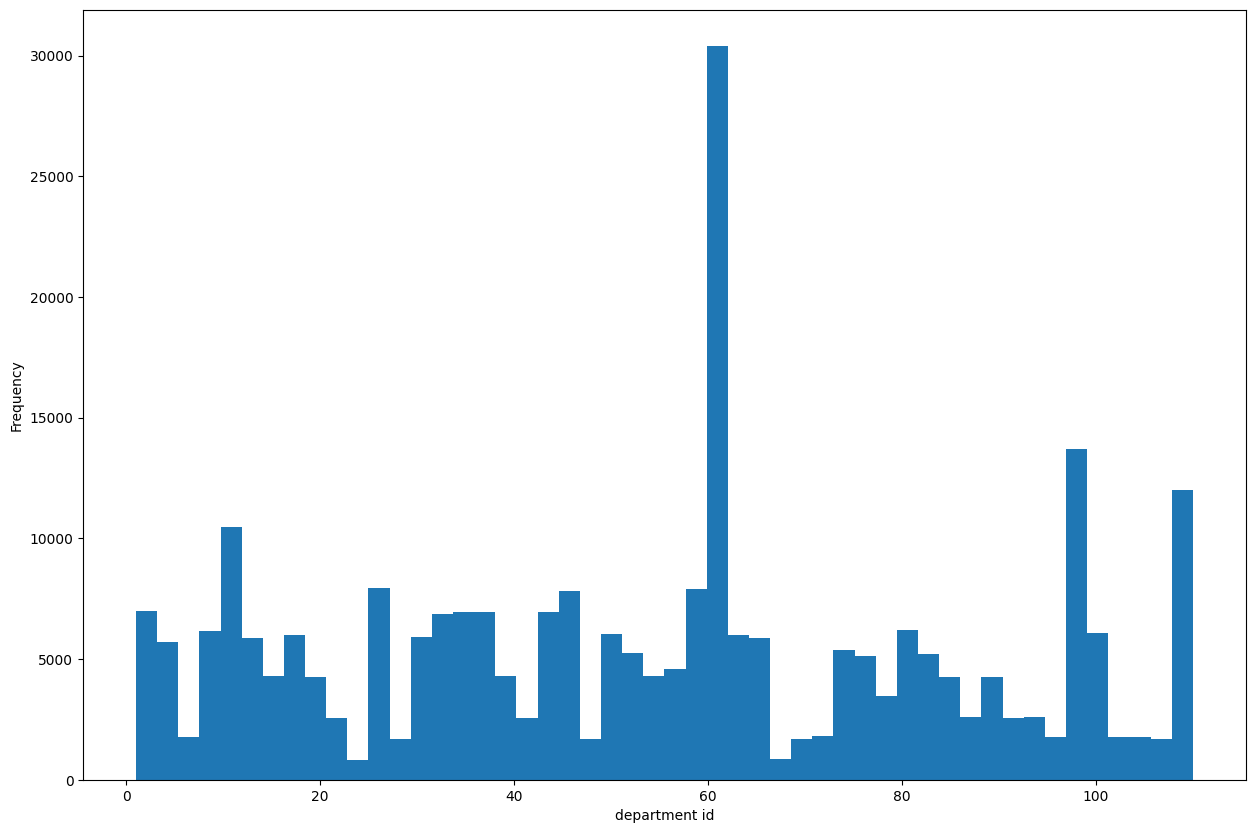

In [46]:
fig=plt.figure(figsize=(15,10))
df['product_class_id'].plot.hist(bins = 50)
plt.xlabel('department id')

**Frequency Plot Of Product Id**

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: ylabel='Frequency'>

Text(0.5, 0, 'product id')

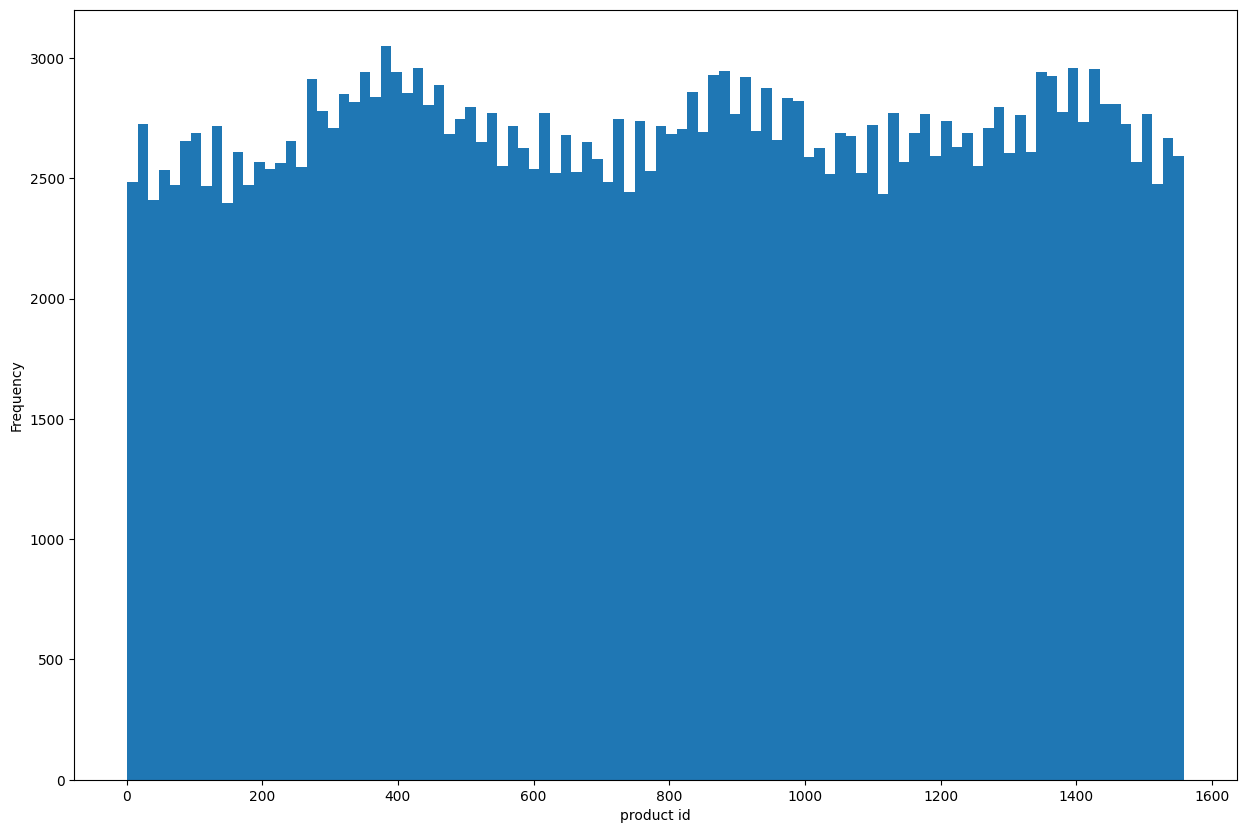

In [47]:
fig=plt.figure(figsize=(15,10))
df['product_id'].plot.hist(bins = 100)
plt.xlabel('product id')

**Frequency Plot Of Unit Sales**

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: ylabel='Frequency'>

Text(0.5, 0, 'Unit Sales')

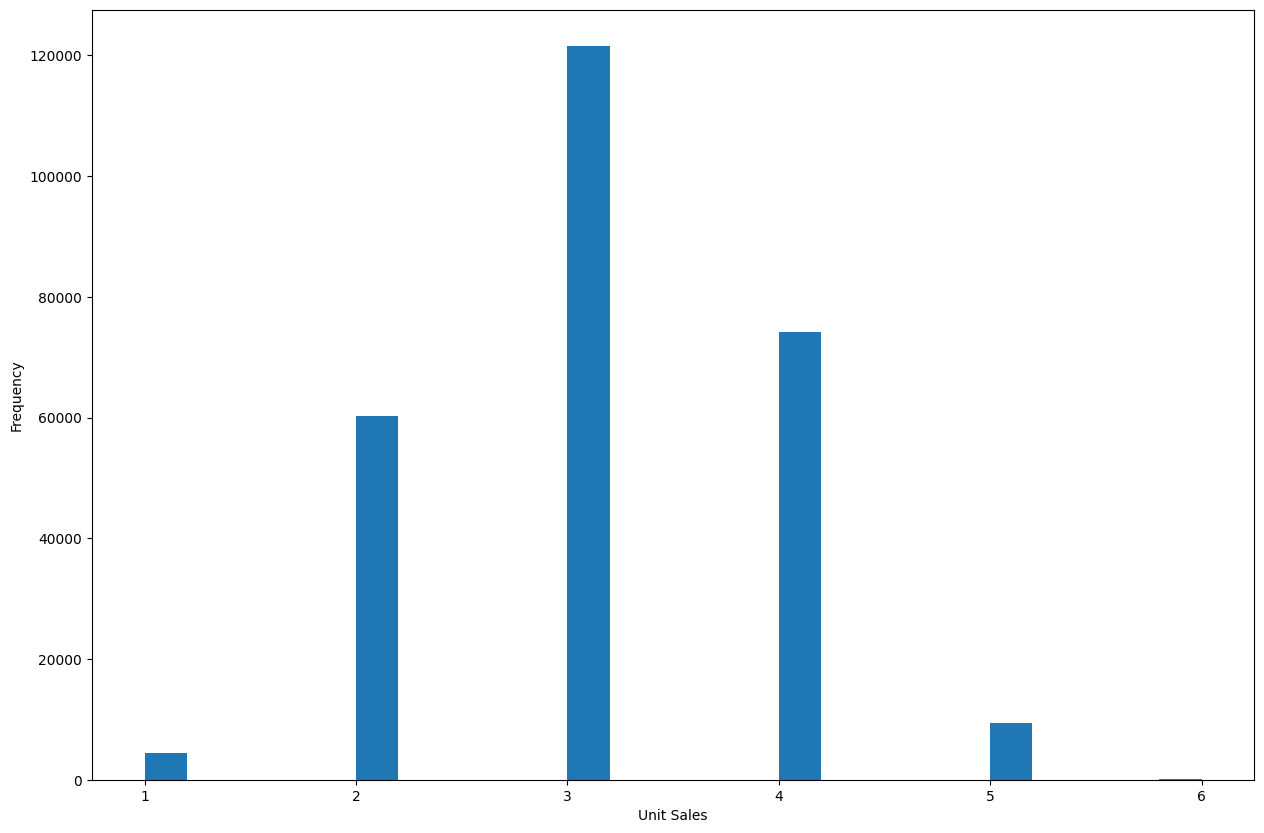

In [48]:
fig=plt.figure(figsize=(15,10))
df['unit_sales'].plot.hist(bins = 25)
plt.xlabel('Unit Sales')

**When do people order**

**Year**

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: ylabel='Frequency'>

Text(0.5, 0, 'year')

([<matplotlib.axis.XTick at 0x7a4940460fd0>,
 [Text(1996, 0, '1996'),
  Text(1997, 0, '1997'),
  Text(1998, 0, '1998'),
  Text(1999, 0, '1999')])

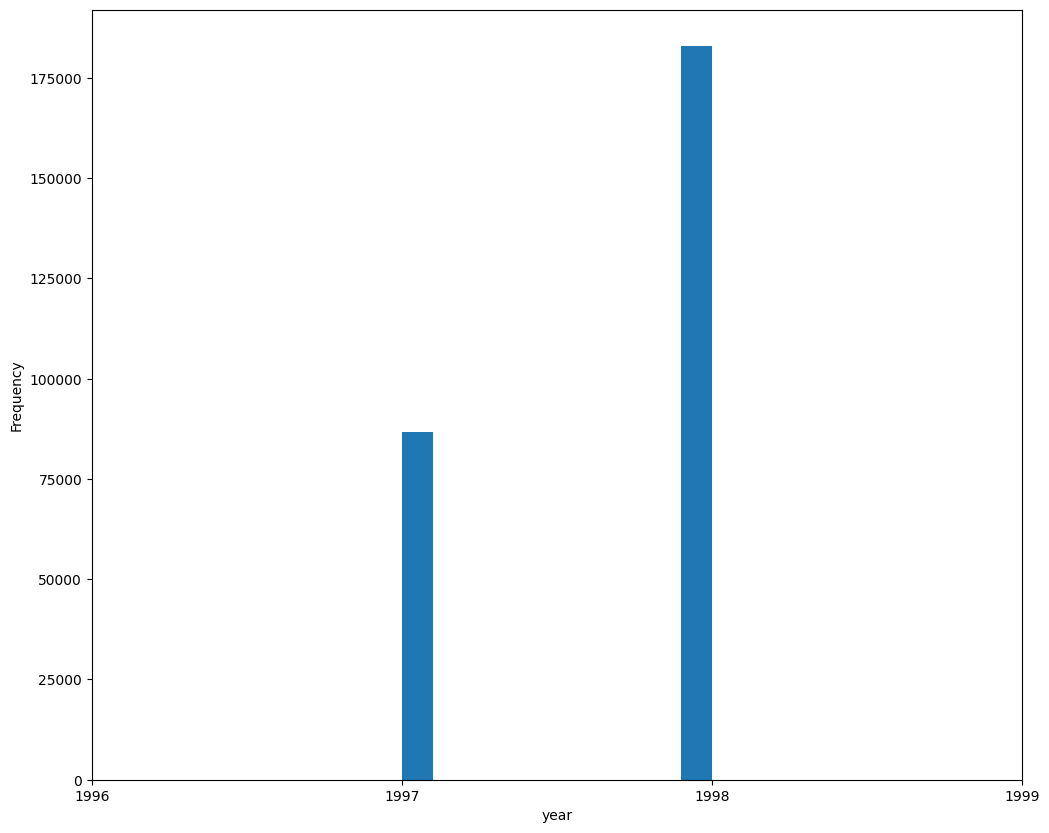

In [49]:
fig=plt.figure(figsize=(12,10))
df['the_year'].plot.hist(bins=10)
plt.xlabel('year')
plt.xticks([1996,1997,1998,1999])

**Month**

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: ylabel='Frequency'>

Text(0.5, 0, 'Month')

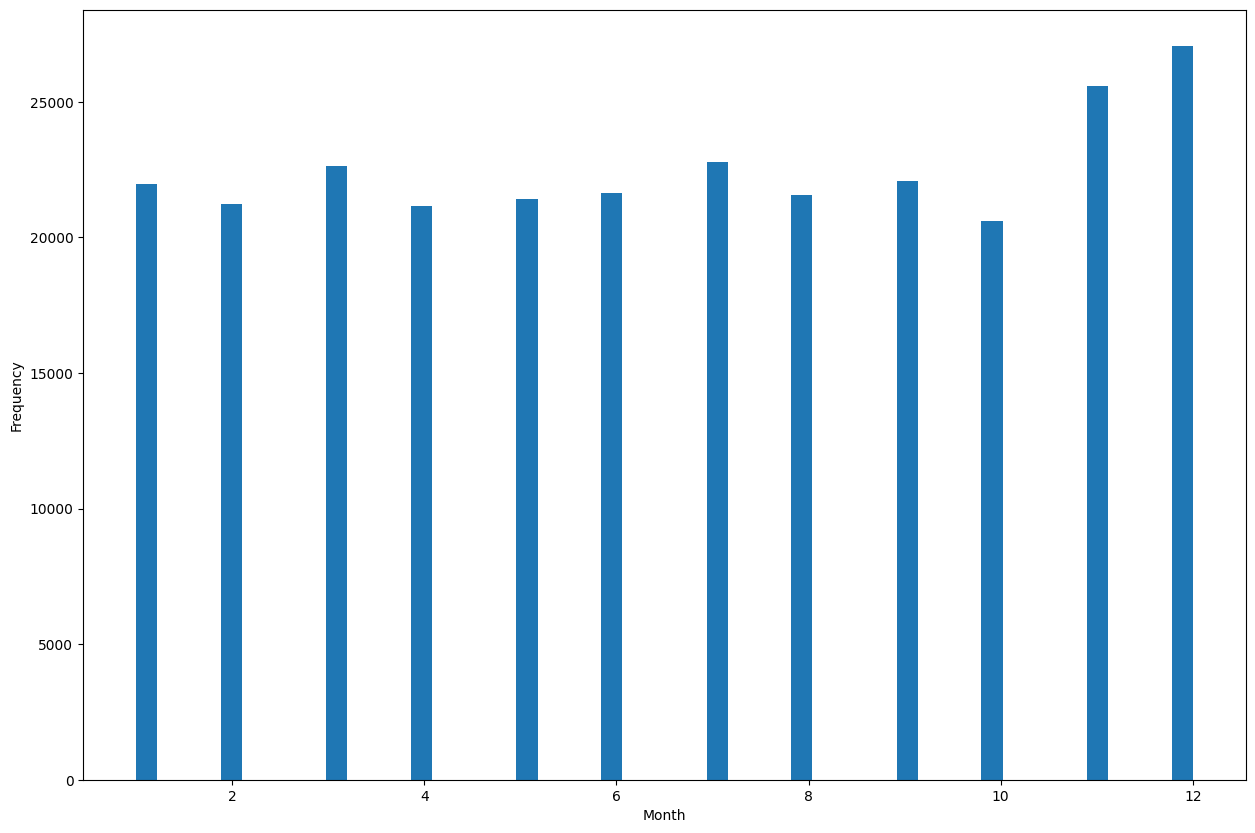

In [50]:
fig=plt.figure(figsize=(15,10))
df['the_month'].plot.hist(bins=50)
plt.xlabel('Month')

**Day Of Month**

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: ylabel='Frequency'>

Text(0.5, 0, 'Day of month')

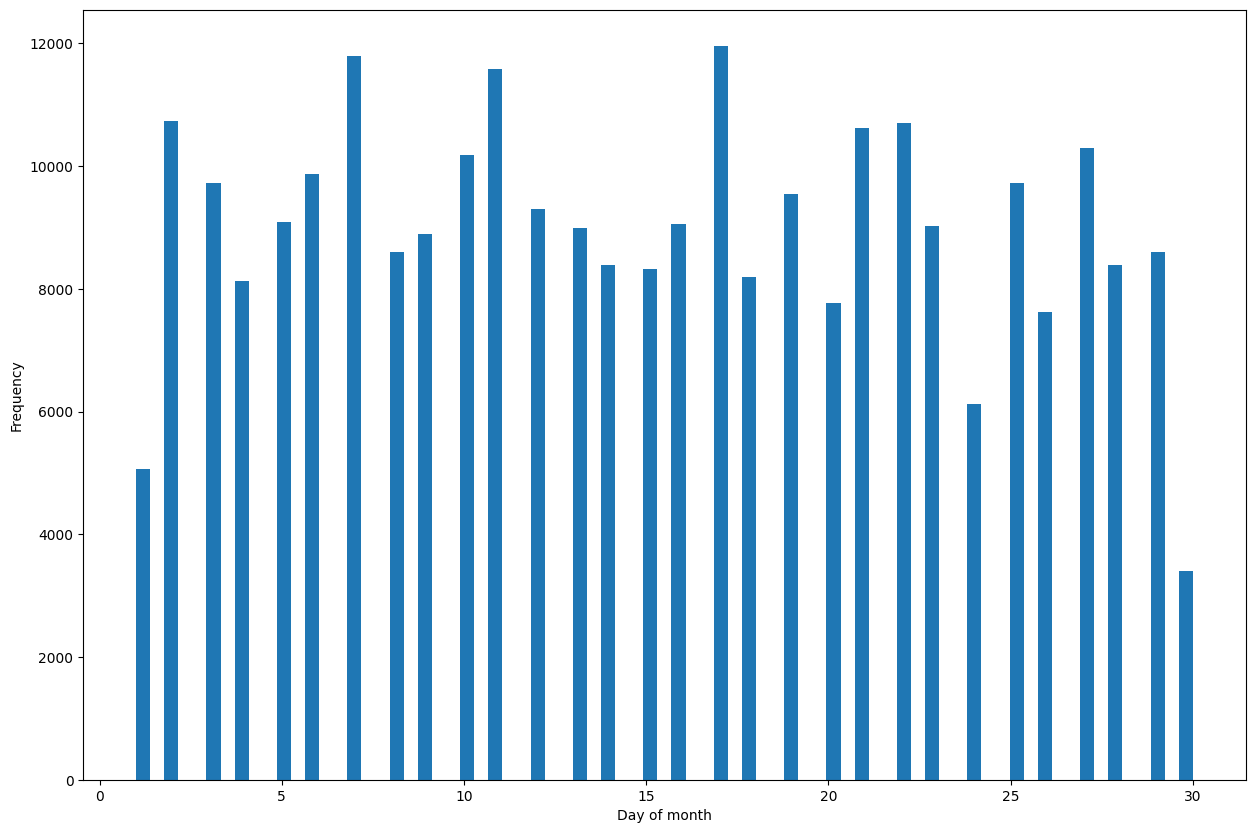

In [51]:
fig=plt.figure(figsize=(15,10))
df['day_of_month'].plot.hist(bins=75)
plt.xlabel('Day of month')

**Day Of Week**

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: >

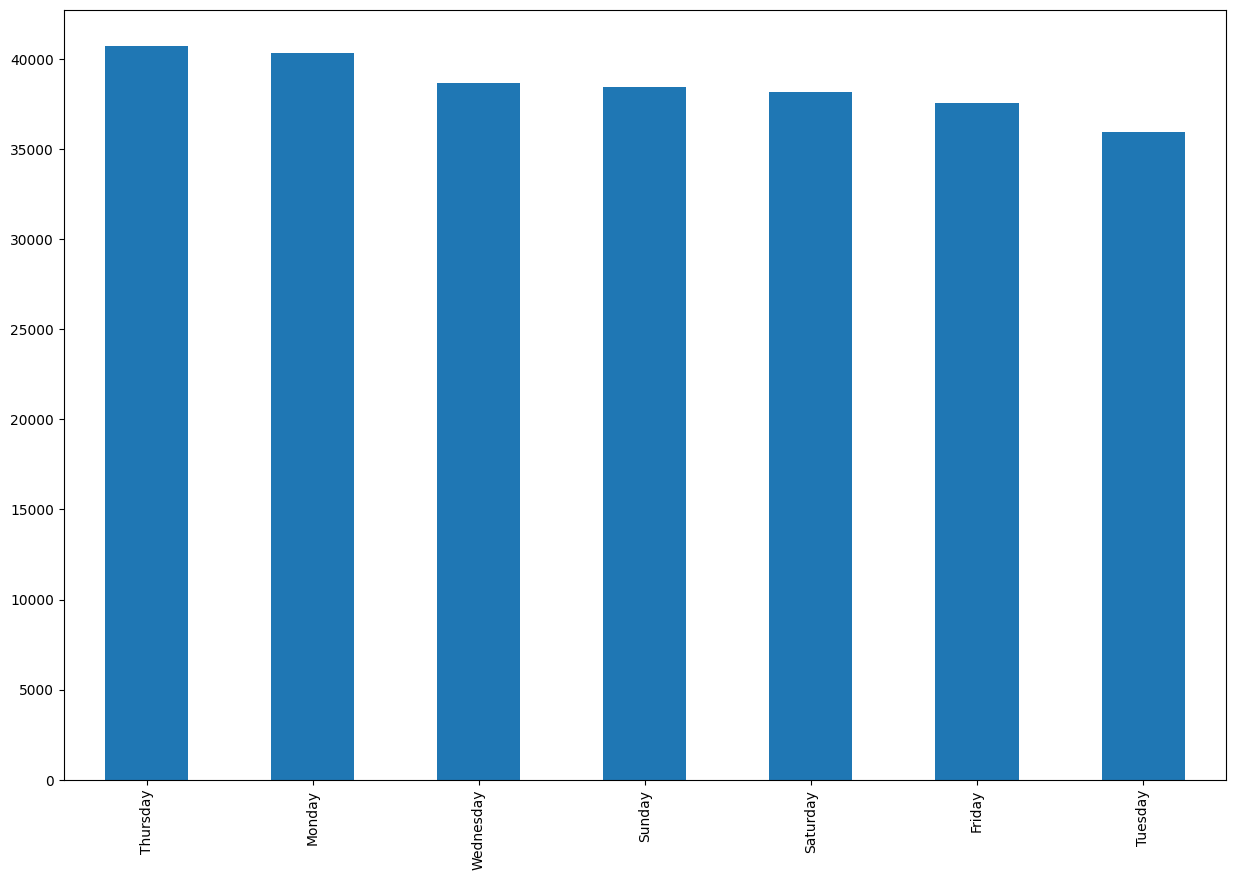

In [52]:
df_day_freq=df['the_day'].value_counts()
fig=plt.figure(figsize=(15, 10))
df_day_freq.plot.bar()

### Top choices

**Top 10 First Choices in Products**

In [53]:
df['products'] = 'Products'
products = df.truncate(before = 605, after = 615)

products = nx.from_pandas_edgelist(products, source = 'products', target = 'product_name', edge_attr = True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [54]:
products

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


{'Products': Text(0.0005344181275287787, 0.0026717405694531887, 'Products'),
 'CDR Oregano': Text(0.09967221624669037, 1.0, 'CDR Oregano'),
 'Fantastic Rye Bread': Text(-0.9721601941068029, -0.21111059023618464, 'Fantastic Rye Bread'),
 'Colony Rye Bread': Text(0.9876381477873003, 0.2157777245194026, 'Colony Rye Bread'),
 'Sphinx Rye Bread': Text(0.912563126663433, -0.3974413146972296, 'Sphinx Rye Bread'),
 'Moms Roasted Chicken': Text(-0.9203134578521772, 0.4082171800495609, 'Moms Roasted Chicken'),
 'American Roasted Chicken': Text(-0.6741431618114346, -0.7559936332999805, 'American Roasted Chicken'),
 'Blue Label Large Canned Shrimp': Text(-0.5025079531784276, 0.859602572742192, 'Blue Label Large Canned Shrimp'),
 'Good Light Beer': Text(0.6550134979659464, 0.7352378586688918, 'Good Light Beer'),
 'Steady Whitening Toothpast': Text(0.5107275222800672, -0.8736509885041364, 'Steady Whitening Toothpast'),
 'Hilltop Deodorant': Text(-0.09702416212212356, -0.9833105498119701, 'Hilltop De

(-1.1779390200056836,
 1.193416973686181,
 -1.191558157542227,
 1.2082476077302569)

Text(0.5, 1.0, 'Top 10 First Choices in Products')

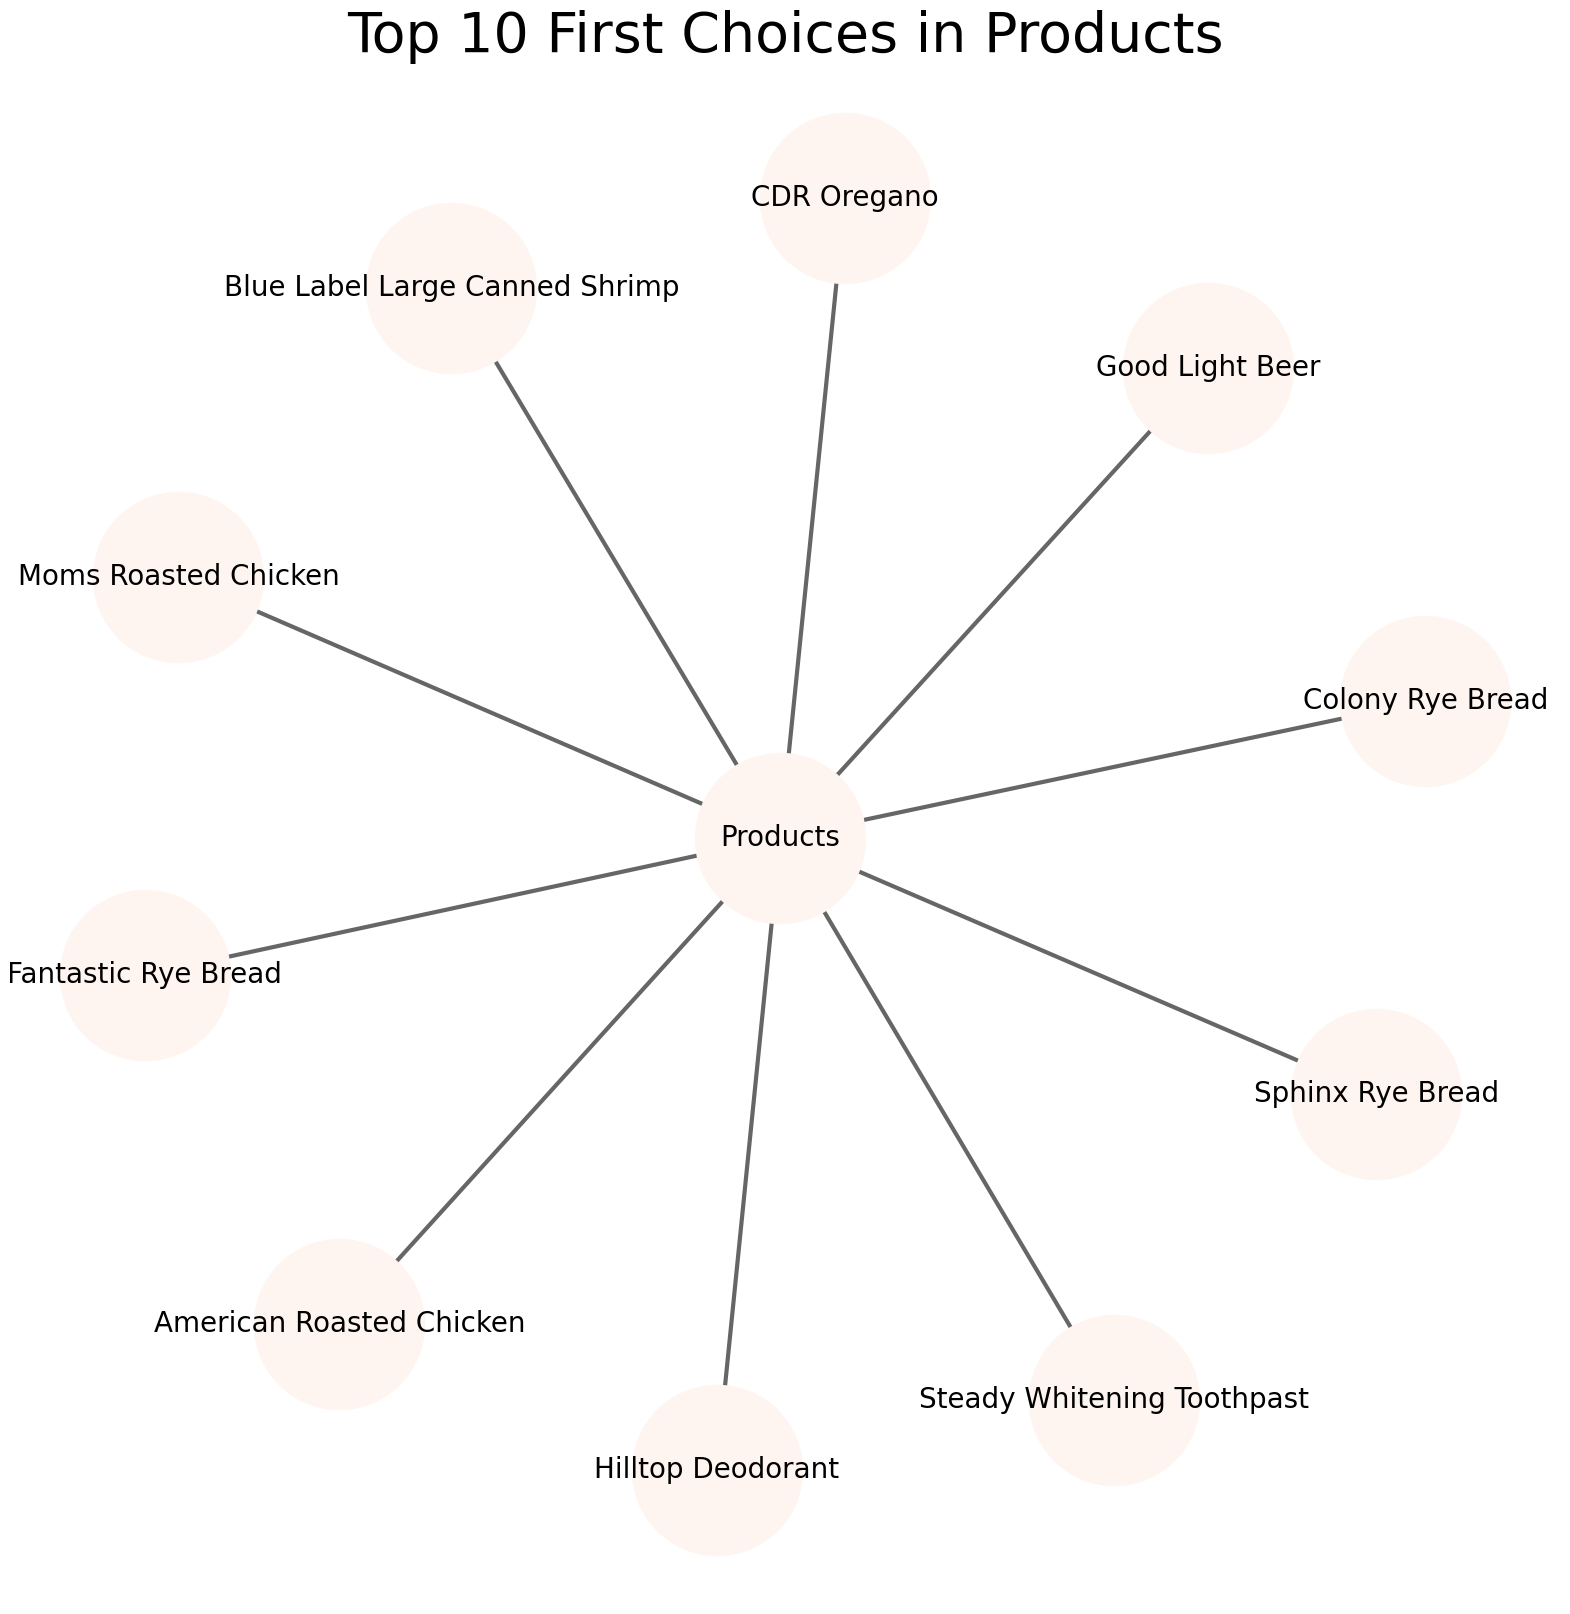

In [55]:
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize']=(20,20)
pos=nx.spring_layout(products)
color=plt.cm.Reds(np.linspace(0,15,1))
nx.draw_networkx_nodes(products,pos,node_size=15000,node_color=color)
nx.draw_networkx_edges(products, pos, width = 3, alpha = 0.6, edge_color = 'black')
nx.draw_networkx_labels(products, pos, font_size = 20)
plt.axis('off')
plt.grid()
plt.title('Top 10 First Choices in Products', fontsize = 40)
plt.show()

**Top 10 First Choices in Department**

In [56]:
df['departments'] = 'Departments'
departments = df.truncate(before = 150, after = 195)

departments = nx.from_pandas_edgelist(departments, source = 'departments', target = 'department', edge_attr = True)

{'Departments': Text(-0.002920988722533655, -0.0009606995910179877, 'Departments'),
 'Produce': Text(0.7655176040470901, 0.5365039363419786, 'Produce'),
 'Household': Text(0.08709894009283542, -1.0, 'Household'),
 'Dairy': Text(0.4268477653835218, 0.9061643400906735, 'Dairy'),
 'Snack Foods': Text(-0.9774110936135941, -0.08549511955100104, 'Snack Foods'),
 'Health and Hygiene': Text(0.8964328492766109, -0.4186481691744631, 'Health and Hygiene'),
 'Eggs': Text(0.9874975890651975, 0.0893595575699915, 'Eggs'),
 'Canned Foods': Text(-0.08125377886005021, 0.955934097697015, 'Canned Foods'),
 'Beverages': Text(-0.8791970030878158, 0.411072728623289, 'Beverages'),
 'Frozen Foods': Text(0.5409213426217413, -0.7736760288978338, 'Frozen Foods'),
 'Deli': Text(-0.39993376416951903, -0.8641999330864478, 'Deli'),
 'Canned Products': Text(-0.7999664622504483, -0.5625023272179166, 'Canned Products'),
 'Periodicals': Text(-0.5636329997830389, 0.8064476171957319, 'Periodicals')}

(-1.1837265052948671,
 1.1938130007464705,
 -1.2053730802581866,
 1.1613071779552016)

Text(0.5, 1.0, 'Top 10 First Choices in Departments')

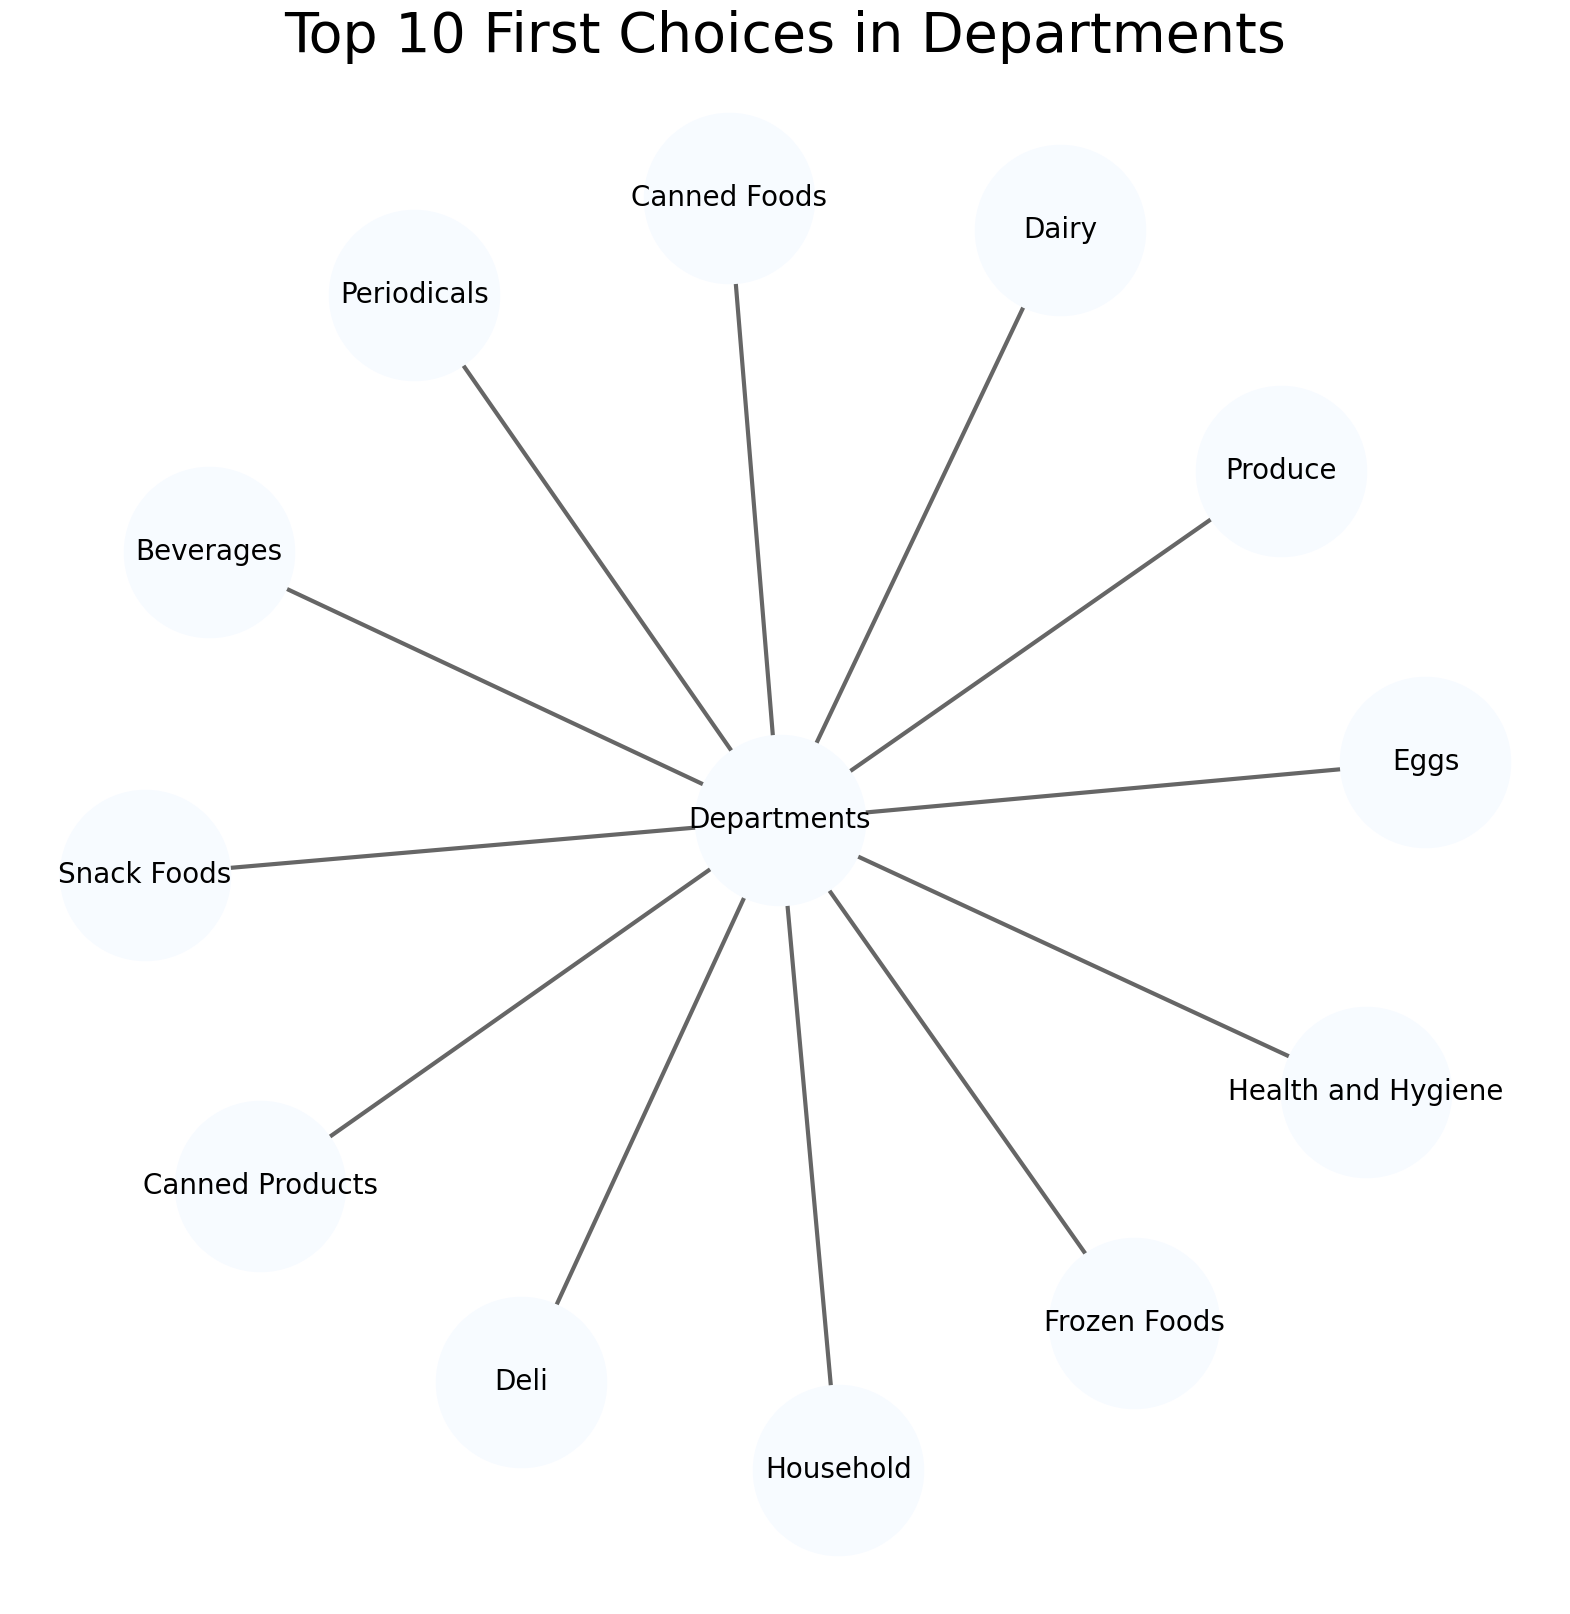

In [57]:
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize']=(20,20)
pos=nx.spring_layout(departments)
color=plt.cm.Blues(np.linspace(0,15,1))
nx.draw_networkx_nodes(departments,pos,node_size=15000,node_color=color)
nx.draw_networkx_edges(departments, pos, width = 3, alpha = 0.6, edge_color = 'black')
nx.draw_networkx_labels(departments, pos, font_size = 20)
plt.axis('off')
plt.grid()
plt.title('Top 10 First Choices in Departments', fontsize = 40)
plt.show()

**Highest Ordered**

**Most Ordered Products**

In [58]:
df['product_name'].value_counts()

Moms Roasted Chicken                           225
Tell Tale Fresh Lima Beans                     219
Steady Whitening Toothpast                     218
Hilltop Silky Smooth Hair Conditioner          216
Steady Childrens Cold Remedy                   214
Nationeel Dried Apples                         214
Sunset Economy Toilet Brush                    213
Hilltop Mint Mouthwash                         213
Ebony Mixed Nuts                               213
Special Wheat Puffs                            212
Ebony Fresh Lima Beans                         211
BBB Best French Roast Coffee                   208
Hermanos Potatos                               208
Red Wing Glass Cleaner                         208
Better Chicken Noodle Soup                     207
BBB Best Apple Butter                          207
Great Pumpernickel Bread                       207
Big Time Orange Popsicles                      207
Great English Muffins                          207
Hermanos Green Pepper          

**Most Ordered Products in Percentage**

In [59]:
df['product_name'].value_counts()/len(df)*100

Moms Roasted Chicken                           0.083420
Tell Tale Fresh Lima Beans                     0.081195
Steady Whitening Toothpast                     0.080825
Hilltop Silky Smooth Hair Conditioner          0.080083
Steady Childrens Cold Remedy                   0.079342
Nationeel Dried Apples                         0.079342
Sunset Economy Toilet Brush                    0.078971
Hilltop Mint Mouthwash                         0.078971
Ebony Mixed Nuts                               0.078971
Special Wheat Puffs                            0.078600
Ebony Fresh Lima Beans                         0.078229
BBB Best French Roast Coffee                   0.077117
Hermanos Potatos                               0.077117
Red Wing Glass Cleaner                         0.077117
Better Chicken Noodle Soup                     0.076746
BBB Best Apple Butter                          0.076746
Great Pumpernickel Bread                       0.076746
Big Time Orange Popsicles                      0

**Most Visited Departments**

In [60]:
df['department'].value_counts()

Produce                38041
Snack Foods            30983
Household              27590
Frozen Foods           27042
Baking Goods           20573
Canned Foods           19090
Dairy                  17195
Health and Hygiene     16643
Beverages              13624
Deli                   12130
Baked Goods             7951
Snacks                  6970
Alcoholic Beverages     6931
Starchy Foods           5198
Periodicals             4318
Eggs                    4099
Breakfast Foods         3462
Canned Products         1779
Meat                    1777
Checkout                1776
Seafood                 1688
Carousel                 860
Name: department, dtype: int64

**Most Visited Departments in Percentage**

In [61]:
df['department'].value_counts()/len(df)*100

Produce                14.103886
Snack Foods            11.487098
Household              10.229127
Frozen Foods           10.025953
Baking Goods            7.627540
Canned Foods            7.077710
Dairy                   6.375130
Health and Hygiene      6.170473
Beverages               5.051164
Deli                    4.497256
Baked Goods             2.947872
Snacks                  2.584161
Alcoholic Beverages     2.569702
Starchy Foods           1.927184
Periodicals             1.600919
Eggs                    1.519724
Breakfast Foods         1.283553
Canned Products         0.659573
Meat                    0.658831
Checkout                0.658461
Seafood                 0.625834
Carousel                0.318849
Name: department, dtype: float64

**Most Visited Aisle**

In [62]:
df['subcategory'].value_counts()

Fresh Vegetables      20859
Fresh Fruit           11972
Soup                   7919
Cheese                 7815
Dried Fruit            7758
Cookies                6930
Wine                   5189
Paper Wipes            5128
Canned Vegetables      5092
Frozen Vegetables      4435
Nuts                   4345
Chocolate Candy        4341
Milk                   4250
Preserves              4237
Chips                  4176
Eggs                   4099
Lightbulbs             3609
Sliced Bread           3586
Muffins                3517
Dips                   3506
Waffles                3501
Pizza                  3481
Cereal                 3462
Cooking Oil            3455
Personal Hygiene       3454
Deli Meats             3435
Batteries              3435
Juice                  3429
Popsicles              3393
Coffee                 3387
Soda                   3367
Pasta                  3148
Ice Cream              2736
Peanut Butter          2660
TV Dinner              2643
Deli Salads         

**Most Visited Aisle in Percentage**

In [63]:
df['subcategory'].value_counts()/len(df)*100

Fresh Vegetables      7.733576
Fresh Fruit           4.438677
Soup                  2.936008
Cheese                2.897449
Dried Fruit           2.876316
Cookies               2.569331
Wine                  1.923847
Paper Wipes           1.901231
Canned Vegetables     1.887884
Frozen Vegetables     1.644298
Nuts                  1.610930
Chocolate Candy       1.609447
Milk                  1.575708
Preserves             1.570888
Chips                 1.548272
Eggs                  1.519724
Lightbulbs            1.338054
Sliced Bread          1.329527
Muffins               1.303945
Dips                  1.299867
Waffles               1.298013
Pizza                 1.290598
Cereal                1.283553
Cooking Oil           1.280958
Personal Hygiene      1.280587
Deli Meats            1.273543
Batteries             1.273543
Juice                 1.271318
Popsicles             1.257971
Coffee                1.255747
Soda                  1.248332
Pasta                 1.167136
Ice Crea

**BarPlot**

**BarPlot of Most Visied Aisle**

<Axes: >

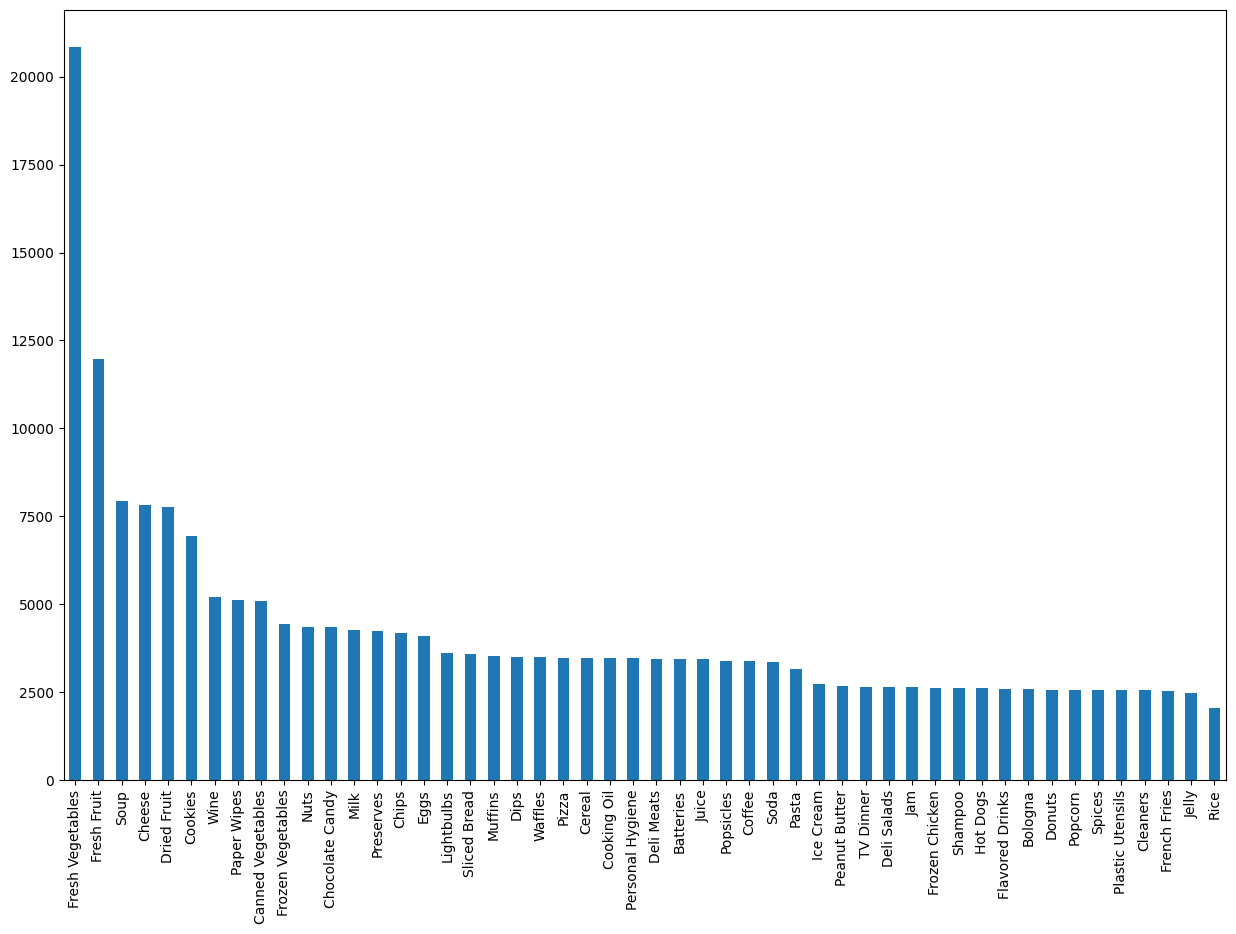

In [64]:
df_subcategory_freq=df['subcategory'].value_counts().iloc[:50]
fig=plt.figure(figsize=(15,10))
df_subcategory_freq.plot.bar()

**BarPlot of Most Visited Department**

<Axes: >

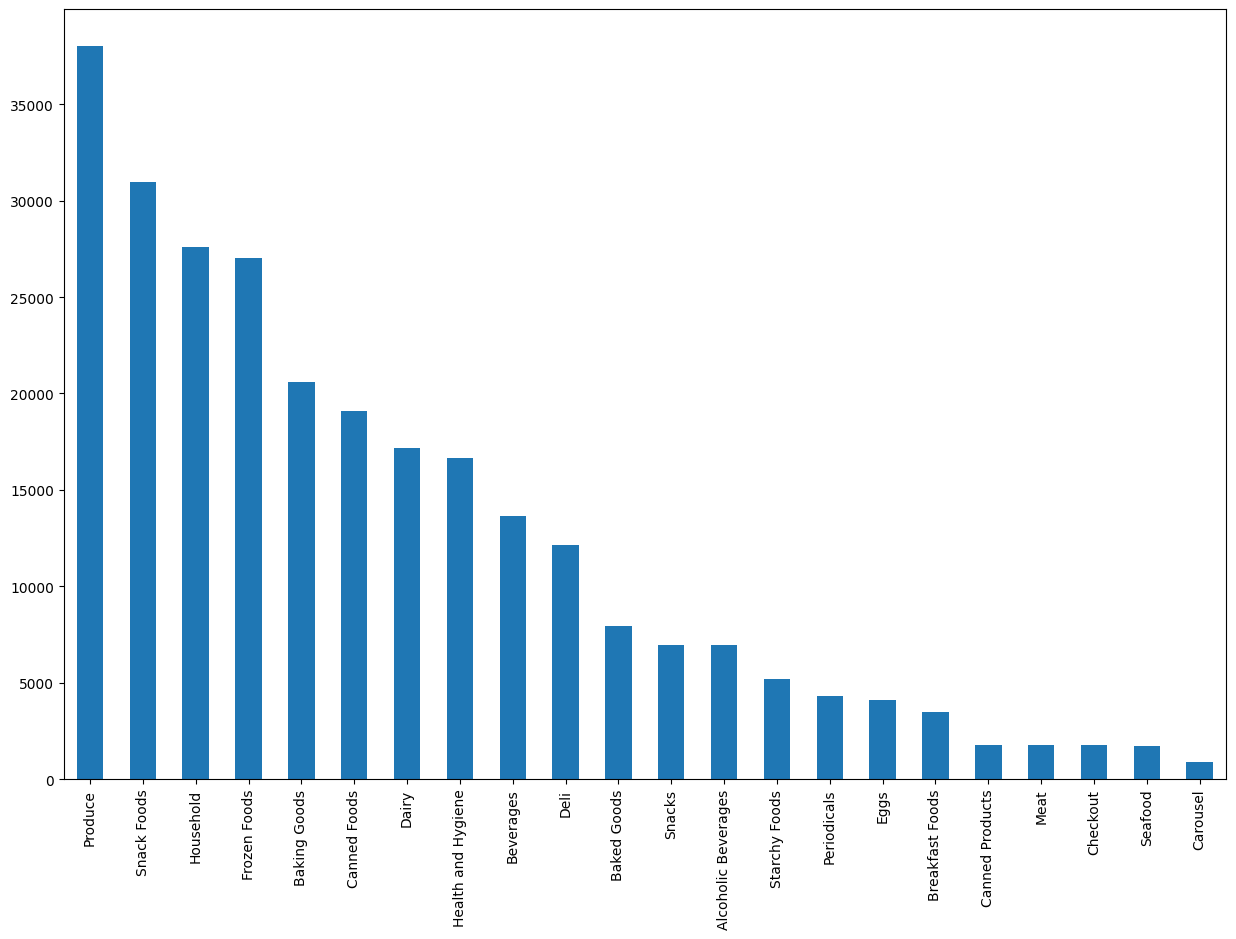

In [65]:
fig=plt.figure(figsize=(15,10))
df['department'].value_counts().plot(kind='bar')

**BarPlot of Most Bought Product**

<Axes: >

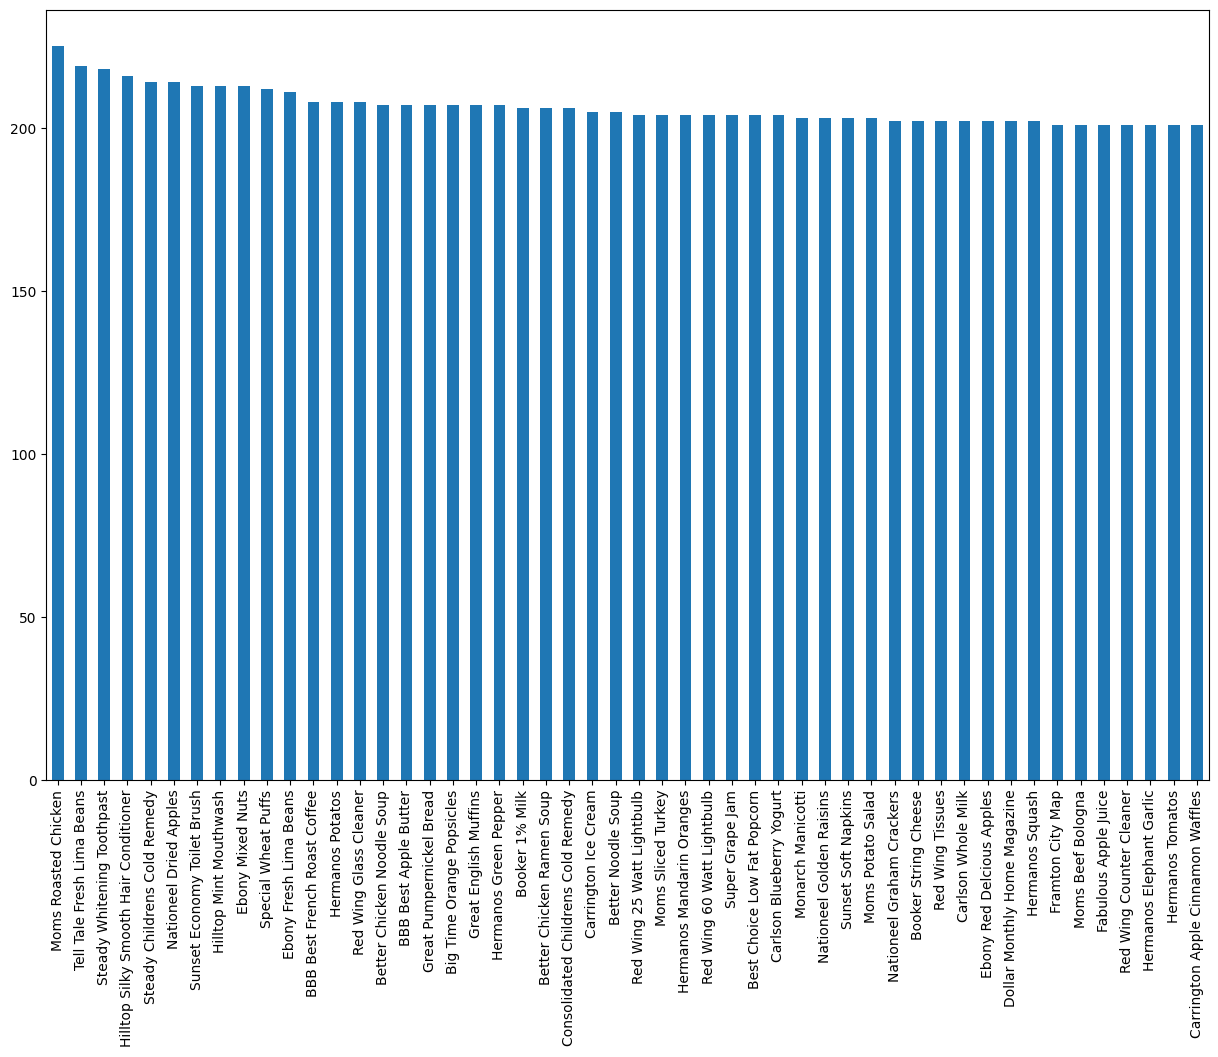

In [66]:
df_freq_products=df['product_name'].value_counts().iloc[:50]
fig=plt.figure(figsize=(15, 10))
df_freq_products.plot.bar()

**Array of Most Bought Product**

In [67]:
y=df_freq_products.head(50).to_frame()
y.index

Index(['Moms Roasted Chicken', 'Tell Tale Fresh Lima Beans',
       'Steady Whitening Toothpast', 'Hilltop Silky Smooth Hair Conditioner',
       'Steady Childrens Cold Remedy', 'Nationeel Dried Apples',
       'Sunset Economy Toilet Brush', 'Hilltop Mint Mouthwash',
       'Ebony Mixed Nuts', 'Special Wheat Puffs', 'Ebony Fresh Lima Beans',
       'BBB Best French Roast Coffee', 'Hermanos Potatos',
       'Red Wing Glass Cleaner', 'Better Chicken Noodle Soup',
       'BBB Best Apple Butter', 'Great Pumpernickel Bread',
       'Big Time Orange Popsicles', 'Great English Muffins',
       'Hermanos Green Pepper', 'Booker 1% Milk', 'Better Chicken Ramen Soup',
       'Consolidated Childrens Cold Remedy', 'Carrington Ice Cream',
       'Better Noodle Soup', 'Red Wing 25 Watt Lightbulb',
       'Moms Sliced Turkey', 'Hermanos Mandarin Oranges',
       'Red Wing 60 Watt Lightbulb', 'Super Grape Jam',
       'Best Choice Low Fat Popcorn', 'Carlson Blueberry Yogurt',
       'Monarch Manicotti'

**TreeMap for Most Bought Products**

<Axes: >

Text(0.5, 1.0, 'tree map for frequent products')

(0.0, 100.0, 0.0, 100.0)

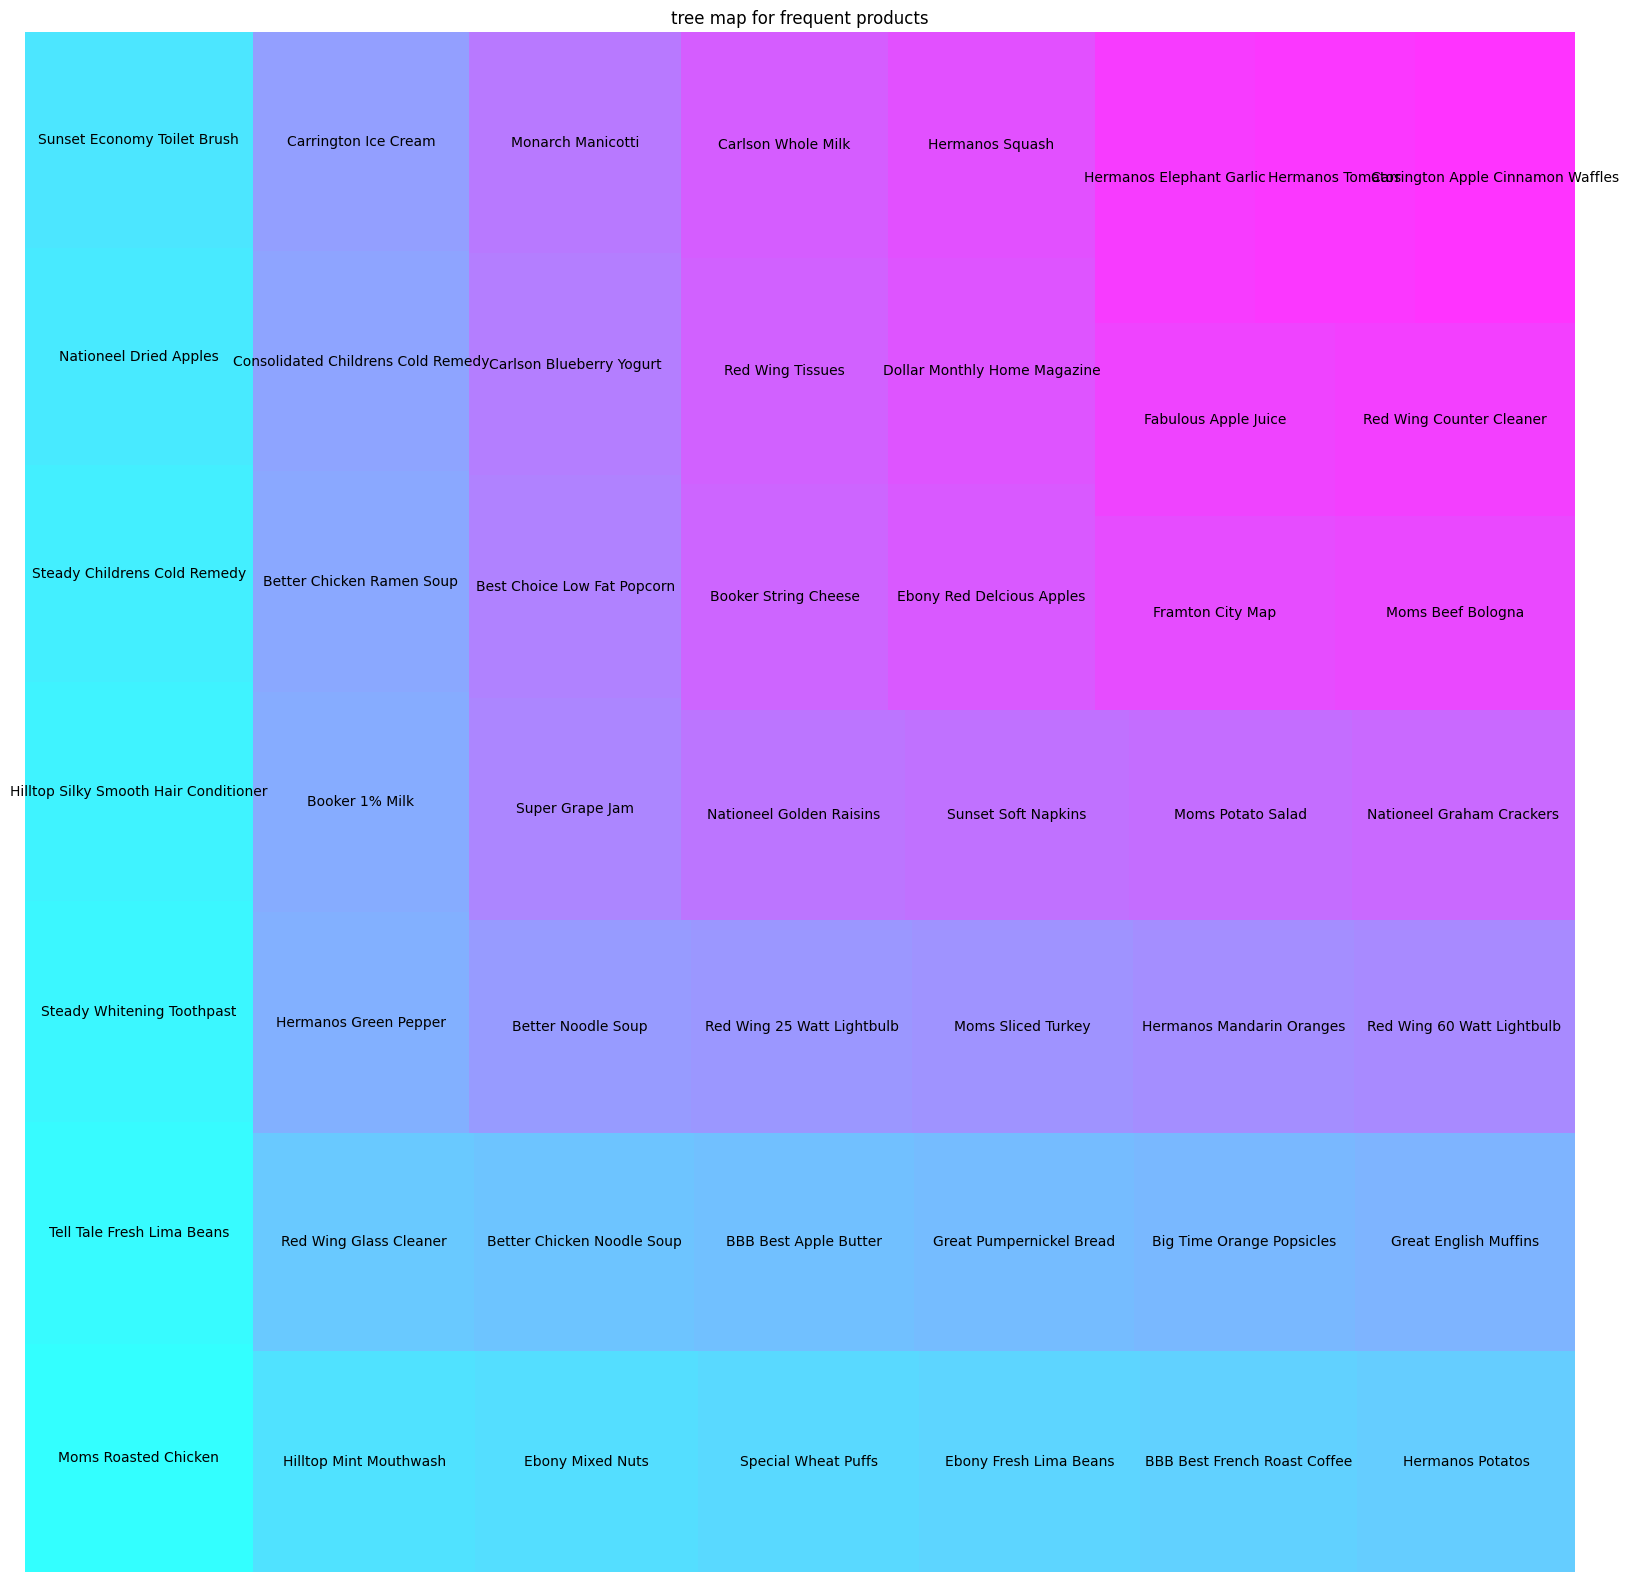

In [68]:
plt.rcParams['figure.figsize']=(20,20)
color=plt.cm.cool(np.linspace(0,1,50))
squarify.plot(sizes=y.values,label=y.index,alpha=0.8,color=color)
plt.title('tree map for frequent products')
plt.axis('off')

# Data Manipulation

In [69]:
df.shape

(269720, 77)

**Drop Duplicates**

In [ ]:
df.drop_duplicates()

In [71]:
df.shape

(269720, 77)

**Missing Values**

In [ ]:
df.isnull().sum()

**Datatypes**

In [ ]:
df.dtypes

# Bivariate Analysis

**Bar Plot**

**Bar Plot between customers and their products per order**

In [ ]:
data_user_orders_num=df.groupby('customer_id')['unit_sales'].count()
data_user_orders_num

In [ ]:
source_data = {}
for i in range(10):
    source_data[str(10*i)+'~'+str(10*(i+1))]=len([x for x in list(data_user_orders_num) if x>=i*10 and x<(i+1)*10])

source_data

In [ ]:
font_size=10
fig_size=(8,6)
mpl.rcParams['font.size']=font_size
mpl.rcParams['figure.figsize']=fig_size
bar_width=0.3


x_axis = tuple(source_data.keys())
y_axis = tuple(source_data.values())
#assign color
plt.bar(x_axis, y_axis, color='rgb')
# descrpitions for x-axis, y-axis
plt.xlabel('Unit sales')
plt.ylabel("No. of customers")
plt.title("Orders Scatter Plot")
plt.show()

**Transaction ID** - create transaction id which denotes a basket

In [ ]:
df['transaction_id'] = df['customer_id'].astype(str) + df['time_id'].astype(str)

In [ ]:
df.head()

**Filtering out Columns**

In [ ]:
cols = [77,3,1,24]
order_products=df[df.columns[cols]]

In [ ]:
order_products.head()

**Average products bought by customers per order**

In [ ]:
data_user_products_num1=order_products.groupby('transaction_id')['product_id'].count()
data_user_products_num1=pd.DataFrame(data_user_products_num1)
data_user_products_num1['transaction_id']=list(data_user_products_num1.index)
data_user_products_num1.columns=['product_num','orderid']
data_user_products_num2=pd.merge(data_user_products_num1,df[['transaction_id','customer_id']],on='transaction_id',how='left')

data_user_products_num3=data_user_products_num2.groupby('customer_id')['product_num'].agg(['sum','count'])
data_user_products_num3['avg']=data_user_products_num3['sum']/data_user_products_num3['count']

In [ ]:
data_user_products_num3.head()

# Featured Products Department Wise

In [ ]:
cols = [1,36,38,24]
departments=df[df.columns[cols]]
departments.head()

**List Of Departments**

In [ ]:
temp=['department']
for i in temp:
    print('@@@@@@Value Count in',i,'@@@@@@@@@')
    print(df[i].value_counts())

**Produce Department**

In [ ]:
produce=departments.loc[df['department'] == 'Produce']
produce.head()

**Featured Products in Produce Department**

In [ ]:
top_produce=produce['product_name'].value_counts().iloc[:10]
top_produce.head()

**Featured Products in Snack Foods Department**

In [ ]:
snacks=df.loc[df['department']=='Snack Foods']
top_snacks=snacks['product_name'].value_counts().iloc[:10]
top_snacks.head()

**Featured Products in HouseHold Department**

In [ ]:
household=df.loc[df['department']=='Household']
top_household=household['product_name'].value_counts().iloc[:10]
print(top_household)

**Featured Products in Frozen Foods Department**

In [ ]:
frozen=df.loc[df['department']=='Frozen Foods']
top_frozen=frozen['product_name'].value_counts().iloc[:10]
print(top_frozen)

**Featured Products in Baking Goods Department**

In [ ]:
baking=df.loc[df['department']=='Baking Goods']
top_baking=baking['product_name'].value_counts().iloc[:10]
print(top_baking)

**Featured Products in Canned Foods Department**

In [ ]:
canned=df.loc[df['department']=='Canned Foods']
top_canned=canned['product_name'].value_counts().iloc[:10]
print(top_canned)

**Featured Products in Dairy Department**

In [ ]:
dairy=(df.loc[df['department'] == 'Dairy'])
top_dairy=dairy['product_name'].value_counts().iloc[:10]
print(top_dairy)

**Featured Products in Health and Hygiene Department**

In [ ]:
dairy=(df.loc[df['department'] == 'Health and Hygiene'])
top_dairy=dairy['product_name'].value_counts().iloc[:10]
print(top_dairy)

**Featured Products in Beverages Department**

In [ ]:
dairy=(df.loc[df['department'] == 'Beverages'])
top_dairy=dairy['product_name'].value_counts().iloc[:10]
print(top_dairy)

**Featured Products in Deli Department**

In [ ]:
dairy=(df.loc[df['department'] == 'Deli'])
top_dairy=dairy['product_name'].value_counts().iloc[:10]
print(top_dairy)

**Featured Products in Alcoholic Beverages Department**

In [ ]:
dairy=(df.loc[df['department'] == 'Alcoholic Beverages'])
top_dairy=dairy['product_name'].value_counts().iloc[:10]
print(top_dairy)

**Featured Products in Starchy Foods Department**

In [ ]:
dairy=(df.loc[df['department'] == 'Starchy Foods'])
top_dairy=dairy['product_name'].value_counts().iloc[:10]
print(top_dairy)

**Featured Products in Eggs Department**

In [ ]:
dairy=(df.loc[df['department'] == 'Eggs'])
top_dairy=dairy['product_name'].value_counts().iloc[:10]
print(top_dairy)

# Market Basket Analysis

![market-basket-analysis.png](attachment:market-basket-analysis.png)

**Importing Libraries**

In [ ]:
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

**Filtering the Columns**

In [ ]:
cols = [77,3,1,24,7,2]
product_name=df[df.columns[cols]]

In [ ]:
product_name.head()

**Counting each product** The number of transactions a product appeared in

In [ ]:
productCountDf = product_name.groupby("product_id",as_index = False)['transaction_id'].count()

In [ ]:
productCountDf.head()

**Arranging Top Products**

In [ ]:
productCountDf = productCountDf.sort_values("transaction_id",ascending = False)

In [ ]:
productCountDf.head()

**Top 100 most frequently purchased products**

In [ ]:
topProdFrame = productCountDf.iloc[0:100,:]
productId= topProdFrame.loc[:,["product_id"]]

In [ ]:
topProdFrame

**Orders containting the the most frequently purchased products**

In [ ]:
MarketBasketdf = product_name[0:0]
for i in range(0,99):
    pId = productId.iloc[i]['product_id']
    stDf = product_name[product_name.product_id == pId ]
    MarketBasketdf = MarketBasketdf.append(stDf,ignore_index = False)

In [ ]:
MarketBasketdf.head()

**Putting the items into 1 transaction**

In [ ]:
basket = MarketBasketdf.groupby(['transaction_id','product_name'])['unit_sales'].sum().unstack().reset_index().fillna(0).set_index('transaction_id')

In [ ]:
basket

# One Hot Encoding

**Converted the units into 1 encoded value**

In [ ]:
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

In [ ]:
basket_sets = basket.applymap(encode_units)

In [ ]:
basket_sets.head()

**Size and shape of basket**

In [ ]:
basket_sets.size

In [ ]:
basket_sets.shape

In [ ]:
dummy=basket_sets.head(10000)

# Apriori Algorithm

**Importing Apriori and Association rules Libraries**

In [ ]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

**Frequent items with support 0.01% using Apriori Algorithm**

In [ ]:
frequent_itemsets = apriori(dummy, min_support=0.0001, use_colnames=True)

In [ ]:
frequent_itemsets

**Association rules using Apriori Algorithm**

In [ ]:
apriori_rules = association_rules(frequent_itemsets, metric="lift", min_threshold= 1)

In [ ]:
apriori_rules

**Filtering out co-realted products with higher Probability**

In [ ]:
apriori_rules[ (apriori_rules['lift'] >= 50) & (apriori_rules['confidence'] >= 0.01) ]

# Recommendations using Apriori Algorithm

In [ ]:
def recommendations_using_Apriori(item):
    recommend = []
    for i in range(0,2646):
        if item == apriori_rules.iloc[i,0]:
            recommend.append(apriori_rules.iloc[i,1])

    return recommend

**5 Recommendations with Better Chicken Noodle Soup**

In [ ]:
product_name = {'Better Chicken Noodle Soup'}
recommentations=recommendations_using_Apriori(product_name)
print(*recommentations[0:5], sep = "\n")

**10 Recommendations with Moms Potato Salad**

In [ ]:
product_name = {'Moms Potato Salad'}
recommentations=recommendations_using_Apriori(product_name)
print(*recommentations[0:10], sep = "\n")

**15 Recommendations with Carrington Ice Cream Sandwich**

In [ ]:
product_name = {'Carrington Ice Cream Sandwich'}
recommentations=recommendations_using_Apriori(product_name)
print(*recommentations[0:15], sep = "\n")

# Fpgrowth Algorithm

**Importing Fpgrowth Libraries**

In [ ]:
from mlxtend.frequent_patterns import fpgrowth

**Frequent Items with support 0.001% using Fpgrowth Algorithm**

In [ ]:
freq_items=fpgrowth(dummy,min_support=.0001,use_colnames=True)

In [ ]:
freq_items

**Association Rules using Fpgrowth Algorithm**

In [ ]:
fpgrowth_rules=association_rules(freq_items,metric="lift",min_threshold=1)

In [ ]:
fpgrowth_rules

# Recommendations using Fpgrowth Algorithm

In [ ]:
def recommendations_using_Fpgrowth(item):
    recommend = []
    for i in range(0,2646):
        if item == fpgrowth_rules.iloc[i,0]:
            recommend.append(fpgrowth_rules.iloc[i,1])

    return recommend

**5 Recommendations with Better Chicken Noodle Soup**

In [ ]:
product_name = {'Better Chicken Noodle Soup'}
recommentations=recommendations_using_Fpgrowth(product_name)
print(*recommentations[0:5], sep = "\n")

**10 Recommendations with Moms Potato Salad**

In [ ]:
product_name = {'Moms Potato Salad'}
recommentations=recommendations_using_Fpgrowth(product_name)
print(*recommentations[0:10], sep = "\n")

**15 Recommendations with Carrington Ice Cream Sandwich**

In [ ]:
product_name = {'Carrington Ice Cream Sandwich'}
recommentations=recommendations_using_Fpgrowth(product_name)
print(*recommentations[0:15], sep = "\n")

# Apriori VS fpgrowth Algorithm

**Calculating Run Time of Apriori Algorithm**

In [ ]:
import time
l=[0.01,0.02,0.03,0.04,0.05]
t=[]
for i in l:
    t1=time.time()
    apriori(dummy,min_support=i,use_colnames=True)
    t2=time.time()
    t.append((t2-t1)*1000)

**Calculating Run Time of Fpgrowth Algorithm**

In [ ]:
l=[0.01,0.02,0.03,0.04,0.05]
f=[]
for i in l:
    t1=time.time()
    fpgrowth(dummy,min_support=i,use_colnames=True)
    t2=time.time()
    f.append((t2-t1)*1000)

**Graph of Run Time between Apriori and Fpgrowth Algorithm**

In [ ]:
sns.lineplot(x=l,y=f,label="fpgrowth")
sns.lineplot(x=l,y=t,label="apriori")
plt.xlabel("Min_support Threshold")
plt.ylabel("Run Time in ms")

![gg.png](attachment:gg.png)